<a href="https://www.kaggle.com/code/abhijitbhandari/monkeypox-analysis?scriptVersionId=103206002" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Dataset

In [1]:
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/deepcontractor/monkeypox-dataset-daily-updated",force = True)

In [2]:
import os
# os.chdir('monkeypox-dataset-daily-updated/')

In [3]:
!pip install waterfallcharts

  Preparing metadata (setup.py) ... - done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=d6ffaa384190985928b49a9d662bd1c1863ee6a95c0c4feef82433611ee05abb
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


In [4]:
!pip uninstall statsmodels -y

Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Successfully uninstalled statsmodels-0.13.2


In [5]:
!pip install statsmodels==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 43.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.12.2 which is incompatible.


In [6]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import waterfall_chart
import datetime
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [8]:
df_daily = pd.read_csv('../input/monkeypox-dataset-daily-updated/Daily_Country_Wise_Confirmed_Cases.csv',skipinitialspace=True)
df_world = pd.read_csv('../input/monkeypox-dataset-daily-updated/Monkey_Pox_Cases_Worldwide.csv',skipinitialspace=True)
df_world_timeline = pd.read_csv('../input/monkeypox-dataset-daily-updated/Worldwide_Case_Detection_Timeline.csv',skipinitialspace=True)

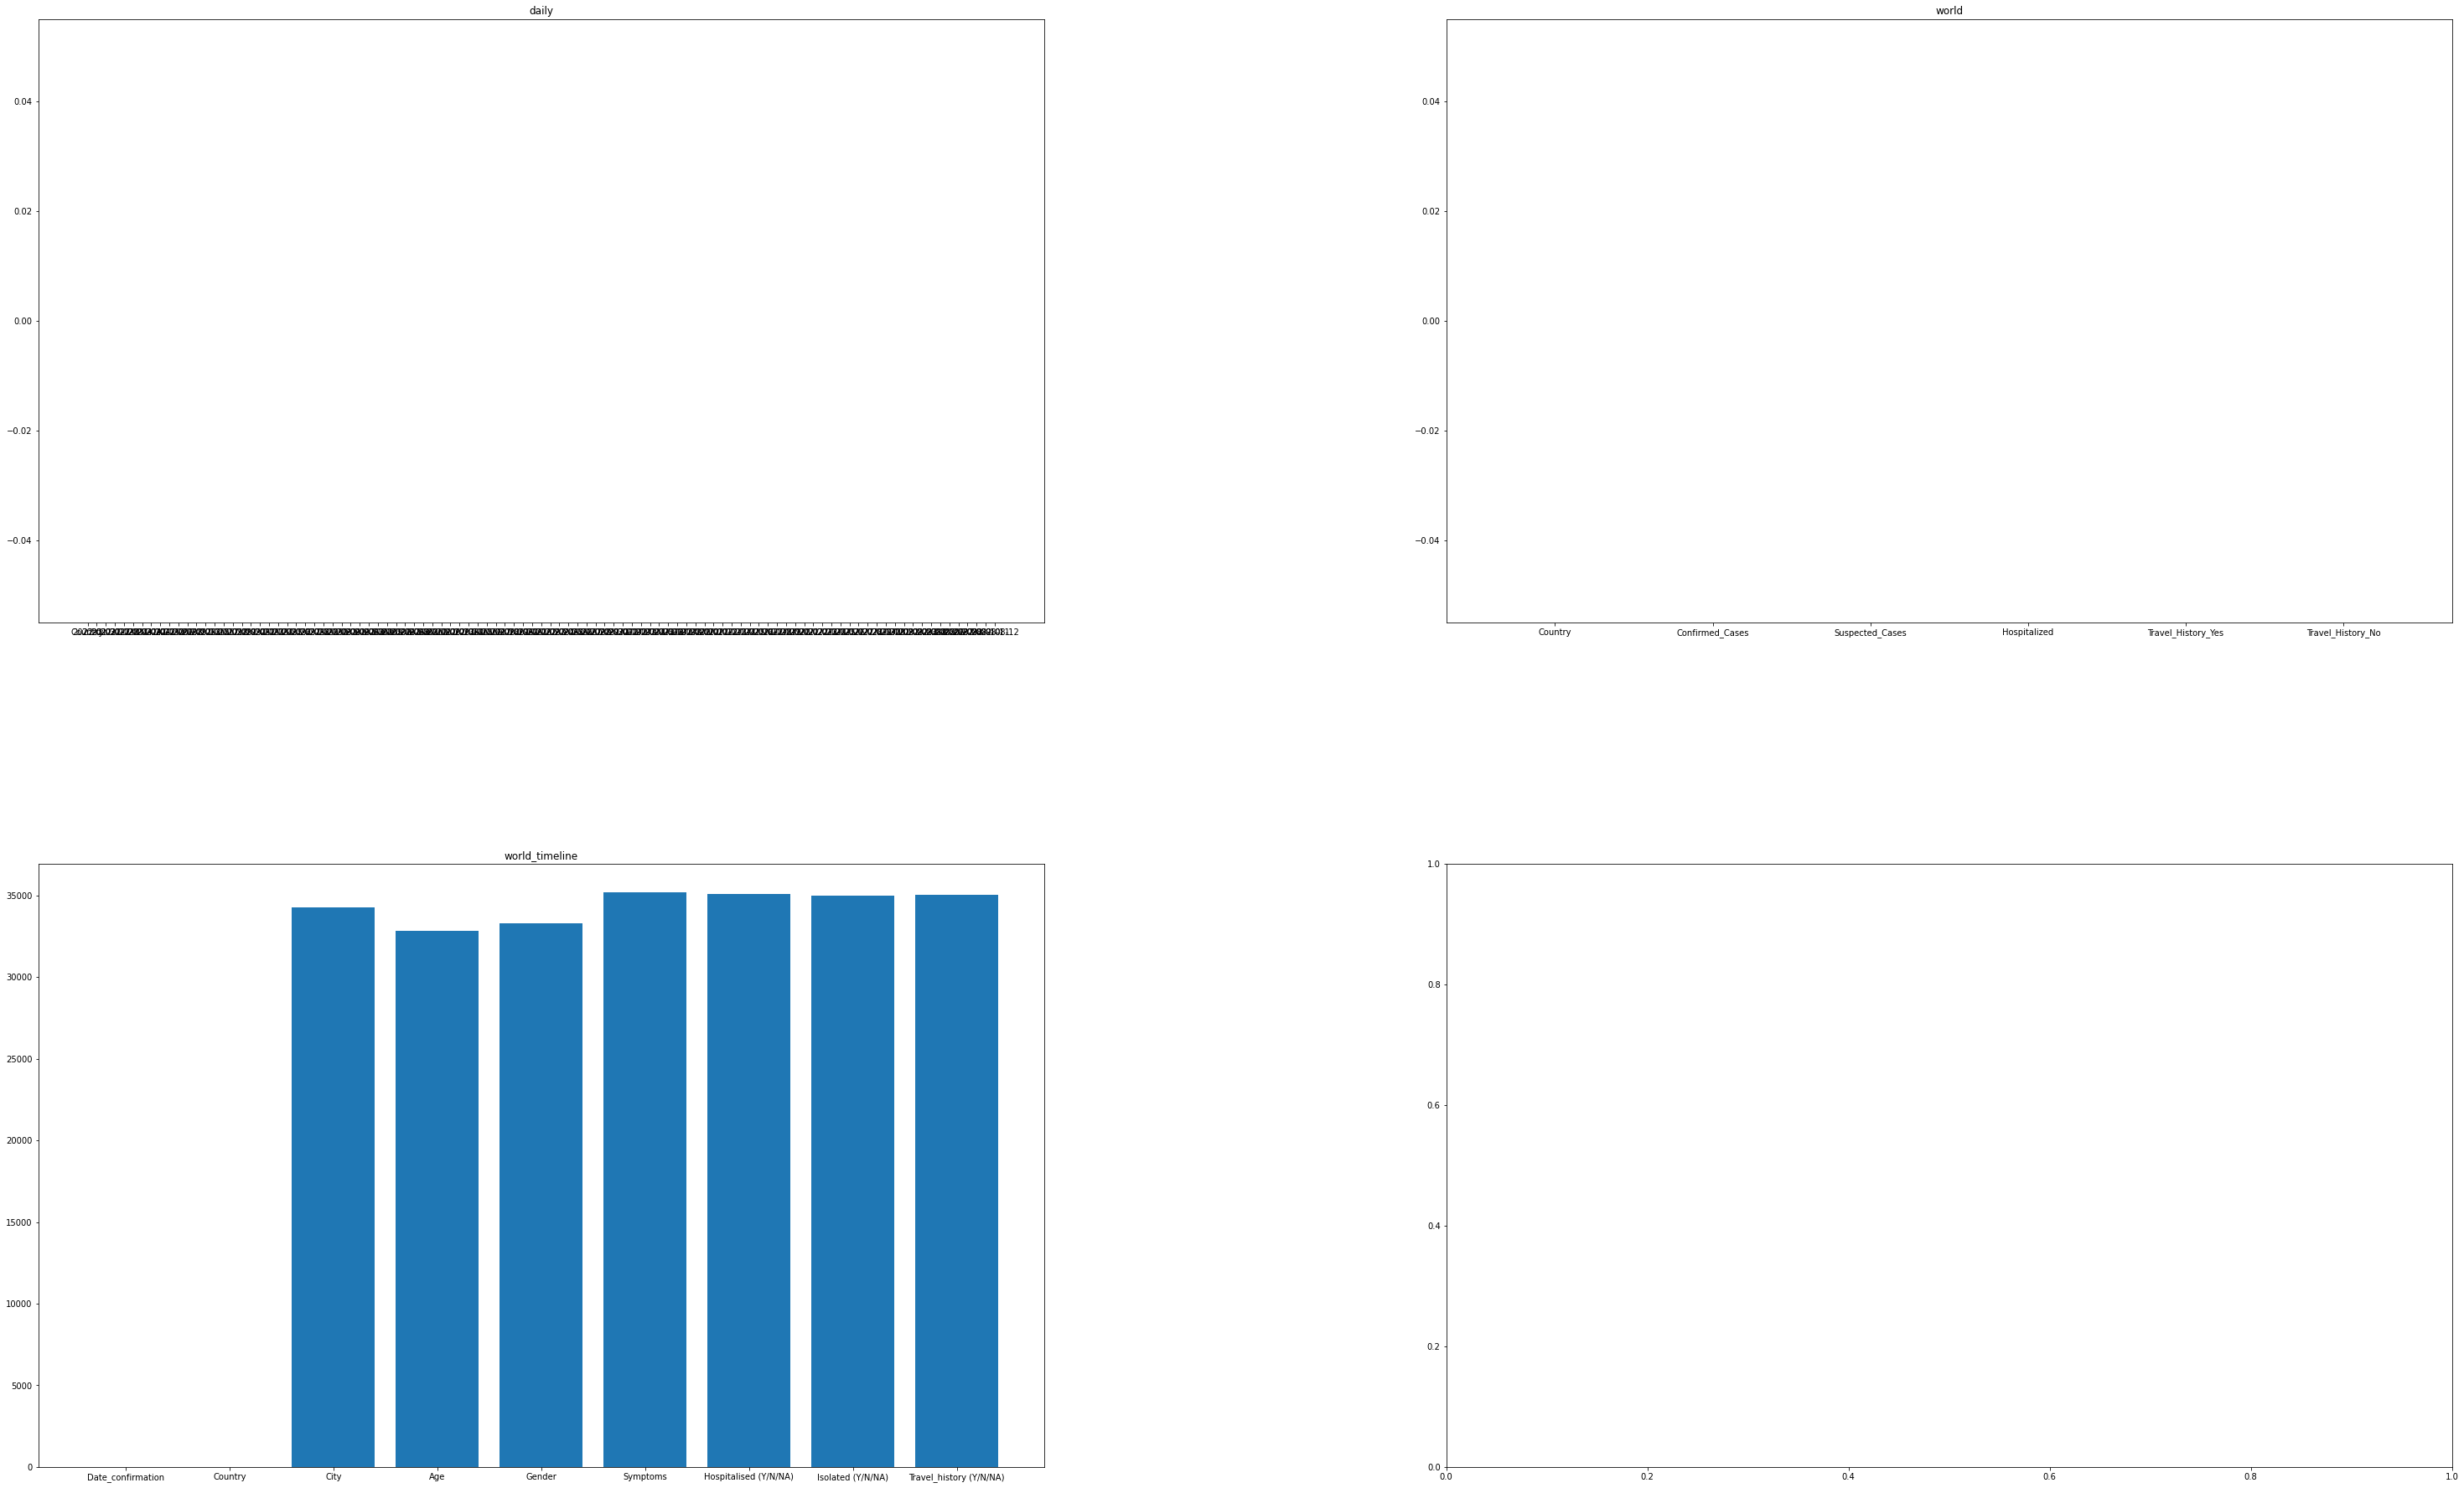

In [9]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (50,30),squeeze=False)
ax = ax.ravel()
frames = [df_daily,df_world,df_world_timeline]
names = ['daily','world','world_timeline']
for i in range(3):
    ax[i].bar(height = frames[i].isnull().sum().values,x = frames[i].isnull().sum().index)
    ax[i].set_title(names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

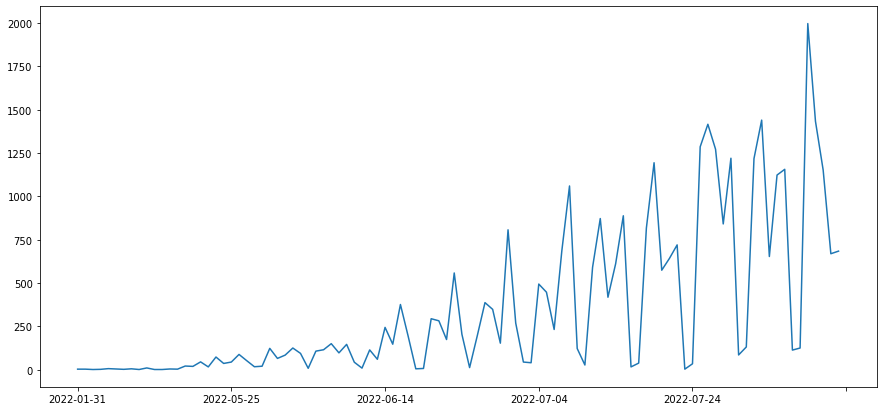

In [10]:
plt.figure(figsize = (15,7))
df_daily.sum().drop('Country').plot(kind = 'line')
plt.show()

In [11]:
daily_sum = df_daily.sum().drop('Country').reset_index()
daily_sum.columns = ['Date','Value']
daily_sum['Value'] = daily_sum['Value'].astype('int')

In [12]:
daily_sum['Date'] = pd.to_datetime(daily_sum['Date'])

In [13]:
daily_sum['Date'] = daily_sum['Date'].dt.strftime("%Y-%m-%d")


In [14]:
daily_sum = daily_sum.groupby('Date')['Value'].sum()

In [15]:
daily_sum = daily_sum.reset_index()

In [16]:
daily_sum.set_index('Date')

,Value
Date,
2022-01-31,3
2022-02-17,3
2022-02-28,1
2022-03-04,2
2022-03-31,6
2022-04-10,4
2022-04-12,2
2022-04-30,5
2022-05-06,1


**ACF is for Moving Average (MA) part of the ARIMA Model
The rule of thumb to decide (p,q) where p is for autoregressive part and q is for moving average part; for an ARIMA model is
How many values are going above or below the upper and low limits of the plot
Here in the acf we see, 5 values are above the upper limit, so for moving average, no of lags (q) = 5**

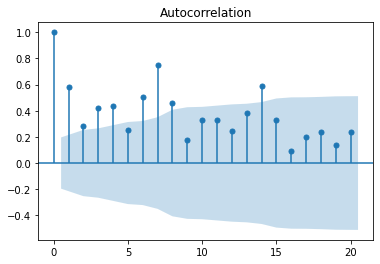

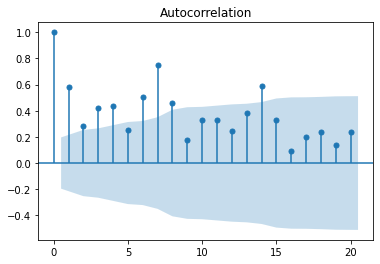

In [17]:
plot_acf(x = daily_sum['Value'],lags= 20)

**Autocorrelation is high. Future data is highly dependent on past data**

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

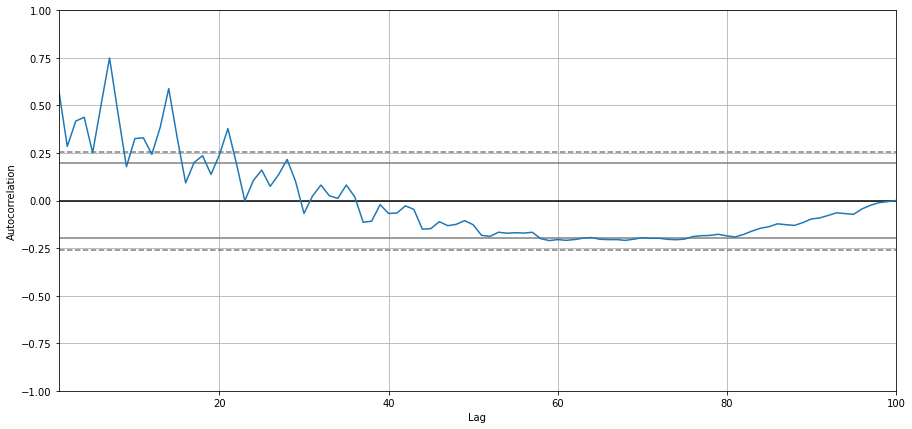

In [18]:
plt.figure(figsize = (15,7))
autocorrelation_plot(daily_sum['Value'])

**Using PACF to compute number of lags for the Autoregressive part**

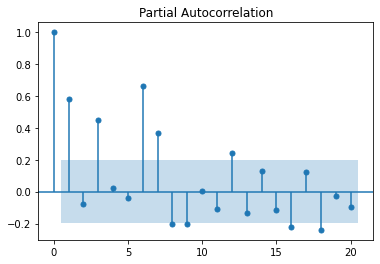

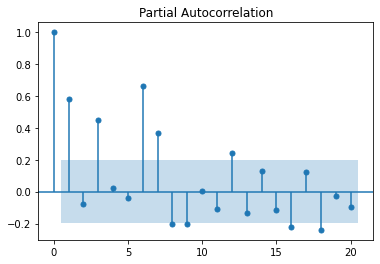

In [19]:
plot_pacf(x = daily_sum['Value'])

**Same as the concept for moving average q value selection, for autoregressive part as well, we can select p as 6**

**However, we are going to use something like gridsearchcv**

**Checking for stationarity**

In [20]:
from statsmodels.tsa.stattools import adfuller
#As per adfuller test
#Null Hypothesis (Ho): Data is not stationary
#Alternate Hypothesis (H1): Data is stationary
def adfuller_test(value):
    output = adfuller(value)
    labels = ["Test-Statistic","p-val","lags used","No of observations used"]
    
    for label,value in zip(labels,output):
        print(label+": "+str(value))
        
    if output[1]<=0.05:
        print("Reject the null hypothesis. Data is stationary")

    else:
        print("Null Hypothesis is true. Data is non-stationary")
    
adfuller_test(daily_sum['Value'])

Test-Statistic: 1.1564935972501476
p-val: 0.9956710699343941
lags used: 11
No of observations used: 88
Null Hypothesis is true. Data is non-stationary


In [21]:
#Shifting the data
daily_sum['Shift_1_diff'] = daily_sum['Value'] - daily_sum['Value'].shift(1)


In [22]:
daily_sum.head()

,Date,Value,Shift_1_diff
0,2022-01-31,3,NaN
1,2022-02-17,3,0.0
2,2022-02-28,1,-2.0
3,2022-03-04,2,1.0
4,2022-03-31,6,4.0


In [23]:
print(daily_sum.shape)

(100, 3)


In [24]:
daily_sum.set_index('Date',inplace = True)
daily_sum

,Value,Shift_1_diff
Date,,
2022-01-31,3,NaN
2022-02-17,3,0.0
2022-02-28,1,-2.0
2022-03-04,2,1.0
2022-03-31,6,4.0
2022-04-10,4,-2.0
2022-04-12,2,-2.0
2022-04-30,5,3.0
2022-05-06,1,-4.0


In [25]:
adfuller_test(daily_sum['Shift_1_diff'].dropna())

Test-Statistic: -5.599134159922751
p-val: 1.2766456622984942e-06
lags used: 10
No of observations used: 88
Reject the null hypothesis. Data is stationary


Text(0.5, 1.0, 'Is it stationary?')

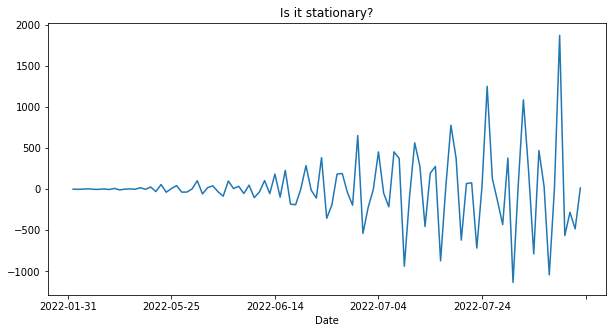

In [26]:
plt.figure(figsize = (10,5))
daily_sum['Shift_1_diff'].plot()
plt.title("Is it stationary?", fontsize = 12)

**Data is stationary**

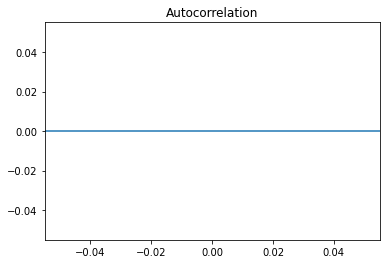

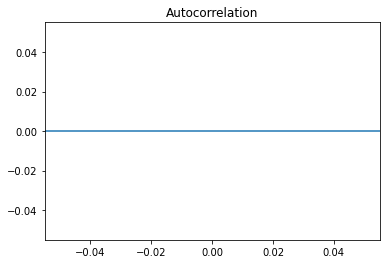

In [27]:
plot_acf(x = daily_sum['Shift_1_diff'],lags= 20)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

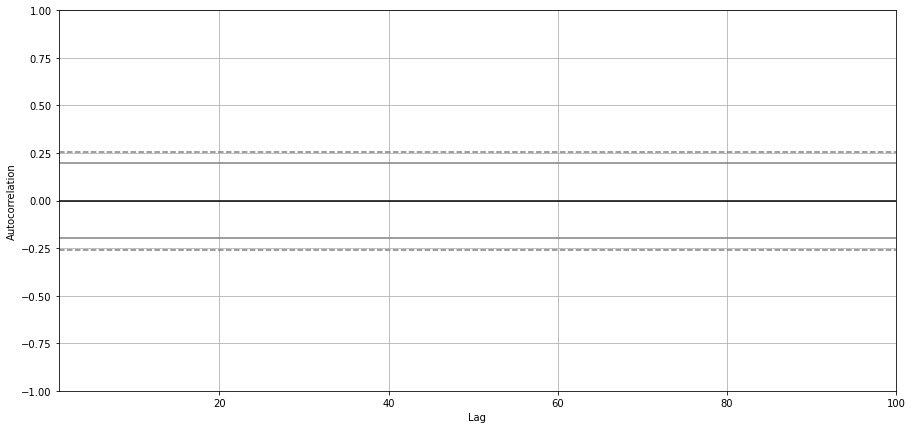

In [28]:
plt.figure(figsize = (15,7))
autocorrelation_plot(daily_sum['Shift_1_diff'])

**No Correlation Among Data**

**Autoregressive Model**

In [29]:
#Here, from the graph, the entire: Autoregressive shut down is at 0 i.e p = 0
#Moving Average Shutdown is 0 i.e q = 0
#Consider d = 1 since lag is 1

#Selecting ARIMA as the data is not seasonal

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [30]:
dataset=daily_sum['Value'].values.astype('float32')
train_size = int(len(dataset)*0.95)
train,test = dataset[0:train_size],dataset[train_size:]
sc = MinMaxScaler(feature_range=(0,1))
train = np.reshape(sc.fit_transform(train.reshape(-1,1)),newshape=(1,-1))[0]
test = np.reshape(sc.fit_transform(test.reshape(-1,1)),newshape=(1,-1))[0]
print(train.shape)
print(test.shape)

(95,)
(5,)


In [31]:
print(len(test))

5


In [32]:
def create_model(train,test,arima_order):

    #dataset = dataset.astype('float32')
    #train_size = int(len(dataset)*0.85)
    #train,test = dataset[0:train_size],dataset[train_size:]
    

    
    

    
    history = [x for x in train]
    
    
    
    predictions = []
    
    
    for t in range(len(test)):
        model = ARIMA(endog = history,order = arima_order)
        model_fit = model.fit()
        
        y_pred = model_fit.forecast()[0]
        

        
        history.append(test[t])
        predictions.append(y_pred)
        

    
    rmse = np.sqrt(mean_squared_error(y_true=test,y_pred=predictions))
    
    return rmse
        

In [33]:
#Using Gridsearch CV
def eval_model(train,test,p_val,d_val,q_val):
    best_score,best_cfg = float("inf"),None
    
    for p in p_val:
        
        for d in d_val:
            
            for q in q_val:
                order = (p,d,q)
                
               
                try:
                    
                    
                
                    rmse = create_model(train = train,test = test,arima_order = order)
                    
                    
                    
                
                    if rmse<best_score:
                        best_score,best_cfg = rmse,order
                        
                except:
                    continue
                
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
                

    
    
    

In [34]:
#Run this cell to calculate best_order: 
p_val = range(0,10)
d_val = range(0,10)
q_val = range(0,10)
best_order = eval_model(train = train,test = test,p_val = p_val,d_val = d_val,q_val = q_val)
#best_order is (0,0,9): computed on a different system code is the same

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36325D-01    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      4      1     0     0   4.441D-08   1.363D-01
  F =  0.13632469513919335     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.7

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01825D-01    |proj g|=  1.63111D-02

At iterate    5    f= -1.01861D-01    |proj g|=  2.76244D-03

At iterate   10    f= -1.01863D-01    |proj g|=  4.45893D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   0.000D+00  -1.019D-01
  F = -0.10186263840822077     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f= -4.32331D-02    |proj g|=  1.29239D-02

At iterate    5    f= -4.32593D-02    |proj g|=  2.99128D-03

At iterate   10    f= -4.32614D-02    |proj g|=  2.98511D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   8.604D-08  -4.326D-02
  F =  -4.3261406222094442E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.13449D-01    |proj g|=  2.52143D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -8.04209D-02    |proj g|=  2.04878D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     21      1     0     0   5.967D-08  -8.042D-02
  F =  -8.0420899654787562E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.57602D-02    |proj g|=  1.69383D-01

At iterate    5    f= -9.07190D-02    |proj g|=  1.53174D-02

At iterate   10    f= -9.21871D-02    |proj g|=  2.11162D-02

At iter

 This problem is unconstrained.



At iterate   45    f= -9.36631D-02    |proj g|=  2.90371D-04

At iterate   50    f= -9.36631D-02    |proj g|=  5.44703D-05

At iterate   55    f= -9.36632D-02    |proj g|=  1.26608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     58     85      1     0     0   2.365D-05  -9.366D-02
  F =  -9.3663155390082770E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.06103D-02    |proj g|=  1.69219D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f= -9.84816D-02    |proj g|=  1.29065D-02

At iterate   30    f= -9.85162D-02    |proj g|=  8.02942D-04

At iterate   35    f= -9.85231D-02    |proj g|=  2.00440D-03

At iterate   40    f= -9.85253D-02    |proj g|=  1.48904D-03

At iterate   45    f= -9.85260D-02    |proj g|=  6.90764D-04

At iterate   50    f= -9.85261D-02    |proj g|=  3.25080D-04

At iterate   55    f= -9.85262D-02    |proj g|=  1.66528D-04

At iterate   60    f= -9.85262D-02    |proj g|=  3.22492D-05

At iterate   65    f= -9.85262D-02    |proj g|=  2.61013D-05

At iterate   70    f= -9.85262D-02    |proj g|=  1.62370D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -2.14537D-01    |proj g|=  8.41088D-02

At iterate   15    f= -2.21986D-01    |proj g|=  4.86110D-03

At iterate   20    f= -2.22288D-01    |proj g|=  1.56535D-02

At iterate   25    f= -2.22876D-01    |proj g|=  8.18874D-03

At iterate   30    f= -2.23043D-01    |proj g|=  5.53238D-04

At iterate   35    f= -2.23095D-01    |proj g|=  1.80807D-03

At iterate   40    f= -2.23116D-01    |proj g|=  1.48056D-03

At iterate   45    f= -2.23131D-01    |proj g|=  1.28978D-03

At iterate   50    f= -2.23140D-01    |proj g|=  1.62704D-03

At iterate   55    f= -2.23144D-01    |proj g|=  1.70853D-03

At iterate   60    f= -2.23148D-01    |proj g|=  4.21088D-04

At iterate   65    f= -2.23150D-01    |proj g|=  1.12759D-03

At iterate   70    f= -2.23151D-01    |proj g|=  4.46851D-04

At iterate   75    f= -2.23152D-01    |proj g|=  9.80069D-04

At iterate   80    f= -2.23153D-01    |proj g|=  3.69124D-04

At iterate   85    f= -2.23153D-01    |proj g|=  2.82421D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09268D-01    |proj g|=  2.13934D-02

At iterate    5    f= -1.09360D-01    |proj g|=  1.13192D-03

At iterate   10    f= -1.09366D-01    |proj g|=  2.03201D-04

At iterate   15    f= -1.09366D-01    |proj g|=  3.78031D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   5.829D-08  -1.094D-01
  F = -0.10936598527360025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.83131D-01    |proj g|=  1.54958D-02

At iterate   10    f= -1.83238D-01    |proj g|=  7.93504D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   5.829D-08  -1.832D-01
  F = -0.18323811947434432     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.22872D-01    |proj g|=  4.68859D-02

At iterate    5    f= -1.23128D-01    |proj g|=  7.26878D-04

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.27214D-01    |proj g|=  2.22880D-01

At iterate    5    f= -2.35939D-01    |proj g|=  4.67307D-03

At iterate   10    f= -2.36264D-01    |proj g|=  7.91204D-03

At iterate   15    f= -2.36338D-01    |proj g|=  1.97773D-03

At iterate   20    f= -2.36469D-01    |proj g|=  1.75221D-02

At iterate   25    f= -2.36579D-01    |proj g|=  9.58554D-03

At iterate   30    f= -2.36652D-01    |proj g|=  4.99633D-03

At iterate   35    f= -2.36690D-01    |proj g|=  3.36947D-03

At iterate   40    f= -2.36711D-01    |proj g|=  4.10388D-03

At iterate   45    f= -2.36721D-01    |proj g|=  1.78692D-03

At iterate   50    f= -2.36729D-01    |proj g|=  1.23524D-03

At iterate   55    f= -2.36734D-01    |proj g|=  1.53100D-03

At iterate   60    f= -2.36736D-01    |proj g|=  2.53857D-03

At iterate   65    f= -2.3

 This problem is unconstrained.



At iterate   35    f= -1.79385D-01    |proj g|=  6.10623D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     49      1     0     0   3.053D-08  -1.794D-01
  F = -0.17938516847125788     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78107D-01    |proj g|=  5.66015D-02


 This problem is unconstrained.



At iterate    5    f= -1.78481D-01    |proj g|=  3.73798D-03

At iterate   10    f= -1.78559D-01    |proj g|=  4.76019D-04

At iterate   15    f= -1.78561D-01    |proj g|=  3.31124D-06

At iterate   20    f= -1.78561D-01    |proj g|=  5.57887D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   5.829D-08  -1.786D-01
  F = -0.17856095834991040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47400D-01    |proj g|=  5.17064D-02

At iterate    5    f= -1.48225D-01    |proj g|=  3.41120D-02

At iterate   10    f= -1.48653D-01    |proj g|=  3.57376D-03

At iterate   15    f= -1.48665D-01    |proj g|=  7.66526D-05

At iterate   20    f= -1.48665D-01    |proj g|=  2.47025D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     30      1     0     0   2.776D-08  -1.487D-01
  F = -0.14866526790902326     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.00563D-01    |proj g|=  1.95817D-01

At iterate    5    f= -3.09109D-01    |proj g|=  6.01774D-03

At iterate   10    f= -3.09253D-01    |proj g|=  2.56236D-03

At iterate   15    f= -3.09275D-01    |proj g|=  3.93255D-03

At iterate   20    f= -3.09423D-01    |proj g|=  8.61241D-03

At iterate   25    f= -3.09483D-01    |proj g|=  3.40214D-03

At iterate   30    f= -3.09523D-01    |proj g|=  5.26831D-03

At iterate   35    f= -3.09546D-01    |proj g|=  4.35588D-03

At iterate   40    f= -3.09562D-01    |proj g|=  3.56031D-03

At iterate   45    f= -3.09576D-01    |proj g|=  1.74132D-03

At iterate   50    f= -3.09582D-01    |proj g|=  8.47833D-04

At iterate   55    f= -3.09586D-01    |proj g|=  8.67817D-04

At iterate   60    f= -3.09589D-01    |proj g|=  1.68780D-03

At iterate   65    f= -3.0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.59908D-01    |proj g|=  1.70606D-01

At iterate    5    f= -2.65096D-01    |proj g|=  5.57521D-03

At iterate   10    f= -2.65720D-01    |proj g|=  4.79243D-03


 This problem is unconstrained.



At iterate   15    f= -2.66216D-01    |proj g|=  1.90586D-02

At iterate   20    f= -2.66426D-01    |proj g|=  9.50653D-03

At iterate   25    f= -2.66565D-01    |proj g|=  4.62152D-03

At iterate   30    f= -2.66642D-01    |proj g|=  4.53051D-03

At iterate   35    f= -2.66691D-01    |proj g|=  1.53528D-03

At iterate   40    f= -2.66708D-01    |proj g|=  9.70185D-04

At iterate   45    f= -2.66718D-01    |proj g|=  1.85188D-03

At iterate   50    f= -2.66727D-01    |proj g|=  2.07452D-03

At iterate   55    f= -2.66733D-01    |proj g|=  1.92116D-03

At iterate   60    f= -2.66739D-01    |proj g|=  2.43258D-03

At iterate   65    f= -2.66742D-01    |proj g|=  5.62722D-04

At iterate   70    f= -2.66745D-01    |proj g|=  2.44754D-04

At iterate   75    f= -2.66746D-01    |proj g|=  3.84343D-04

At iterate   80    f= -2.66747D-01    |proj g|=  1.81216D-04

At iterate   85    f= -2.66748D-01    |proj g|=  8.02858D-04

At iterate   90    f= -2.66749D-01    |proj g|=  5.68523D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  195    f= -2.66750D-01    |proj g|=  2.99760D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7    196    265      2     0     0   1.776D-07  -2.668D-01
  F = -0.26675028543773899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.03925D-01    |proj g|=  2.83099D-01

At iterate    5    f= -2.27250D-01    |proj g|=  1.30776D-02

At iterate   10    f= -2.28580D-01    |proj g|=  2.48962D-03


 This problem is unconstrained.



At iterate   15    f= -2.28583D-01    |proj g|=  3.00304D-04

At iterate   20    f= -2.28607D-01    |proj g|=  6.86179D-03

At iterate   25    f= -2.28665D-01    |proj g|=  1.96022D-03

At iterate   30    f= -2.28669D-01    |proj g|=  9.22210D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     52      1     0     0   1.367D-04  -2.287D-01
  F = -0.22866945481115408     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.00289D-01    |proj g|=  3.09456D-01

At iterate    5    f= -2.30738D-01    |proj g|=  1.69383D-02

At iterate   10    f= -2.32531D-01    |proj g|=  1.03736D-03


 This problem is unconstrained.



At iterate   15    f= -2.32689D-01    |proj g|=  6.30205D-03

At iterate   20    f= -2.33038D-01    |proj g|=  1.12196D-03

At iterate   25    f= -2.33062D-01    |proj g|=  2.76879D-04

At iterate   30    f= -2.33064D-01    |proj g|=  3.18237D-04

At iterate   35    f= -2.33065D-01    |proj g|=  1.45239D-04

At iterate   40    f= -2.33065D-01    |proj g|=  1.90542D-05

At iterate   45    f= -2.33065D-01    |proj g|=  3.04756D-06

At iterate   50    f= -2.33065D-01    |proj g|=  8.32390D-06

At iterate   55    f= -2.33065D-01    |proj g|=  2.36366D-05

At iterate   60    f= -2.33065D-01    |proj g|=  9.39526D-06

At iterate   65    f= -2.33065D-01    |proj g|=  5.74263D-06

At iterate   70    f= -2.33065D-01    |proj g|=  1.39055D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   15    f= -1.64721D-01    |proj g|=  6.11985D-04

At iterate   20    f= -1.64723D-01    |proj g|=  3.00565D-05

At iterate   25    f= -1.64723D-01    |proj g|=  1.13798D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     34      1     0     0   5.829D-08  -1.647D-01
  F = -0.16472301189918914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.64462D-01    |proj g|=  3.84135D-01

At iterate    5    f= -4.86064D-01    |proj g|=  1.12540D-02

At iterate   10    f= -4.86171D-01    |proj g|=  5.23028D-03

At iterate   15    f= -4.86178D-01    |proj g|=  2.97706D-05

At iterate   20    f= -4.86178D-01    |proj g|=  6.10623D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     20     24      1     0     0   6.106D-08  -4.862D-01
  F = -0.48617772220892297     

CONVERG

 This problem is unconstrained.



At iterate   10    f= -4.73848D-01    |proj g|=  1.92528D-03

At iterate   15    f= -4.73849D-01    |proj g|=  8.90954D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     19     22      1     0     0   6.106D-08  -4.738D-01
  F = -0.47384912972888610     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51460D-01    |proj g|=  3.76001D-01


 This problem is unconstrained.



At iterate    5    f= -4.73343D-01    |proj g|=  1.61241D-02

At iterate   10    f= -4.74003D-01    |proj g|=  6.36787D-03

At iterate   15    f= -4.74011D-01    |proj g|=  1.13859D-04

At iterate   20    f= -4.74011D-01    |proj g|=  3.33067D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     21     27      1     0     0   3.331D-08  -4.740D-01
  F = -0.47401146292960955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -4.63733D-01    |proj g|=  1.22420D-02

At iterate   10    f= -4.64679D-01    |proj g|=  1.05801D-03

At iterate   15    f= -4.64682D-01    |proj g|=  5.50671D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     18     22      1     0     0   2.776D-08  -4.647D-01
  F = -0.46468153882137980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.83304D-01    |proj g|=  2.92943D-01

At iter

 This problem is unconstrained.



At iterate   10    f= -4.01889D-01    |proj g|=  5.07469D-03

At iterate   15    f= -4.01983D-01    |proj g|=  3.38215D-03

At iterate   20    f= -4.02009D-01    |proj g|=  8.38296D-04

At iterate   25    f= -4.02024D-01    |proj g|=  4.21620D-03

At iterate   30    f= -4.02062D-01    |proj g|=  3.20821D-03

At iterate   35    f= -4.02080D-01    |proj g|=  4.18703D-03

At iterate   40    f= -4.02090D-01    |proj g|=  1.22208D-03

At iterate   45    f= -4.02099D-01    |proj g|=  1.32924D-03

At iterate   50    f= -4.02105D-01    |proj g|=  4.95715D-04

At iterate   55    f= -4.02109D-01    |proj g|=  1.23379D-03

At iterate   60    f= -4.02113D-01    |proj g|=  1.24140D-03

At iterate   65    f= -4.02115D-01    |proj g|=  7.42034D-04

At iterate   70    f= -4.02117D-01    |proj g|=  6.15574D-04

At iterate   75    f= -4.02119D-01    |proj g|=  3.29031D-04

At iterate   80    f= -4.02120D-01    |proj g|=  1.63327D-03

At iterate   85    f= -4.02121D-01    |proj g|=  4.49579D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76106D-02    |proj g|=  6.03684D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      4      1     0     0   4.510D-08   4.761D-02
  F =   4.7610554864824149E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.10118D-01    |proj g|=  1.05052D+00

At iterate   15    f= -1.10941D-01    |proj g|=  1.24565D-01

At iterate   20    f= -1.10945D-01    |proj g|=  2.29469D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     28      1     0     0   2.295D-05  -1.109D-01
  F = -0.11094493558653204     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14752D-01    |proj g|=  2.14227D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -8.71162D-02    |proj g|=  1.24952D-02

At iterate   25    f= -8.71289D-02    |proj g|=  9.70514D-04

At iterate   30    f= -8.71297D-02    |proj g|=  1.89959D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     32     40      1     0     0   1.714D-05  -8.713D-02
  F =  -8.7129739339240633E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.09357D-01    |proj g|=  1.41806D+01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f= -1.83584D-01    |proj g|=  1.02028D-03

At iterate   35    f= -1.83589D-01    |proj g|=  3.24298D-03

At iterate   40    f= -1.83590D-01    |proj g|=  4.18119D-03

At iterate   45    f= -1.83590D-01    |proj g|=  2.59595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     47     77      1     0     0   1.074D-04  -1.836D-01
  F = -0.18358957062019415     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.70571D-01    |proj g|=  1.47858D+01

At iterate    5    f= -1.83210D-01    |proj g|=  7.28889D-02

At iterate   10    f= -1.83306D-01    |proj g|=  8.85570D-01

At iterate   15    f= -1.83381D-01    |proj g|=  3.18881D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     24      1     0     0   3.048D-06  -1.834D-01
  F = -0.18338077732944097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.46779D-01    |proj g|=  2.15891D-01

At iterate   10    f= -2.47064D-01    |proj g|=  1.78914D-01

At iterate   15    f= -2.47138D-01    |proj g|=  1.42672D-02

At iterate   20    f= -2.47380D-01    |proj g|=  1.52181D-02

At iterate   25    f= -2.47387D-01    |proj g|=  4.41591D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   1.221D-07  -2.474D-01
  F = -0.24738677923951999     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

 This problem is unconstrained.



At iterate   20    f= -2.48402D-01    |proj g|=  2.66337D-02

At iterate   25    f= -2.48418D-01    |proj g|=  2.59093D-02

At iterate   30    f= -2.48441D-01    |proj g|=  2.88103D-05

At iterate   35    f= -2.48441D-01    |proj g|=  5.68989D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     43      1     0     0   5.690D-07  -2.484D-01
  F = -0.24844137901534305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -2.39178D-01    |proj g|=  4.88759D-01

At iterate   15    f= -2.39222D-01    |proj g|=  3.75081D-03

At iterate   20    f= -2.39305D-01    |proj g|=  5.03754D-03

At iterate   25    f= -2.39330D-01    |proj g|=  8.81902D-03

At iterate   30    f= -2.39335D-01    |proj g|=  1.54043D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   1.776D-07  -2.393D-01
  F = -0.23933537742197478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

 This problem is unconstrained.



At iterate   20    f= -1.81467D-01    |proj g|=  2.33908D-03

At iterate   25    f= -1.81470D-01    |proj g|=  2.07886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     37      1     0     0   1.654D-06  -1.815D-01
  F = -0.18146980716684155     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.57264D-01    |proj g|=  4.57720D+00

At iterate    5    f= -3.59829D-01    |proj g|=  5.07328D-01

At iter

 This problem is unconstrained.



At iterate   20    f= -3.65186D-01    |proj g|=  3.69370D-01

At iterate   25    f= -3.65295D-01    |proj g|=  2.27832D-02

At iterate   30    f= -3.65391D-01    |proj g|=  3.40423D-01

At iterate   35    f= -3.65795D-01    |proj g|=  7.86059D-02

At iterate   40    f= -3.65837D-01    |proj g|=  4.92273D-05

At iterate   45    f= -3.65837D-01    |proj g|=  1.65726D-03

At iterate   50    f= -3.65838D-01    |proj g|=  1.41693D-02

At iterate   55    f= -3.65845D-01    |proj g|=  2.75018D-02

At iterate   60    f= -3.65852D-01    |proj g|=  1.08842D-02

At iterate   65    f= -3.65855D-01    |proj g|=  3.12416D-02

At iterate   70    f= -3.65857D-01    |proj g|=  3.25816D-03

At iterate   75    f= -3.65859D-01    |proj g|=  2.23019D-03

At iterate   80    f= -3.65860D-01    |proj g|=  8.02460D-03

At iterate   85    f= -3.65860D-01    |proj g|=  2.72183D-03

At iterate   90    f= -3.65860D-01    |proj g|=  8.78551D-03

At iterate   95    f= -3.65861D-01    |proj g|=  3.59021D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.60000D-01    |proj g|=  4.17387D+00

At iterate    5    f= -3.62133D-01    |proj g|=  3.33331D-01

At iterate   10    f= -3.64535D-01    |proj g|=  3.36394D+00

At iterate   15    f= -3.68718D-01    |proj g|=  1.21849D-01

At iterate   20    f= -3.68823D-01    |proj g|=  3.21550D-01

At iterate   25    f= -3.68880D-01    |proj g|=  1.86419D-01

At iterate   30    f= -3.69509D-01    |proj g|=  3.09087D-01

At iterate   35    f= -3.69543D-01    |proj g|=  3.29781D-04

At iterate   40    f= -3.69570D-01    |proj g|=  2.79334D-02

At iterate   45    f= -3.69627D-01    |proj g|=  9.63580D-03

At iterate   50    f= -3.69651D-01    |proj g|=  8.49097D-03

At iterate   55    f= -3.69662D-01    |proj g|=  1.38715D-02

At iterate   60    f= -3.69667D-01    |proj g|=  1.03742D-02

At iterate   65    f= -3.6

 This problem is unconstrained.



At iterate   10    f= -3.16202D-01    |proj g|=  9.75100D-01

At iterate   15    f= -3.16373D-01    |proj g|=  7.32459D-02

At iterate   20    f= -3.16627D-01    |proj g|=  1.19580D-01

At iterate   25    f= -3.16679D-01    |proj g|=  3.70564D-02

At iterate   30    f= -3.16918D-01    |proj g|=  2.44157D-01

At iterate   35    f= -3.17066D-01    |proj g|=  1.09512D-04

At iterate   40    f= -3.17066D-01    |proj g|=  7.38298D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     49      1     0     0   7.383D-07  -3.171D-01
  F = -0.31706603190477978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.11854D-01    |proj g|=  3.89842D+00

At iterate    5    f= -3.13913D-01    |proj g|=  1.56732D-01

At iterate   10    f= -3.14262D-01    |proj g|=  7.82486D-01

At iterate   15    f= -3.14369D-01    |proj g|=  2.89511D-02

At iterate   20    f= -3.14538D-01    |proj g|=  2.94846D-02

At iterate   25    f= -3.14747D-01    |proj g|=  1.36084D-01

At iterate   30    f= -3.14847D-01    |proj g|=  2.45859D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73393D-01    |proj g|=  4.36323D-01

At iterate    5    f= -2.75813D-01    |proj g|=  1.29209D-01

At iterate   10    f= -2.75908D-01    |proj g|=  2.42327D-02

At iterate   15    f= -2.76354D-01    |proj g|=  6.86614D-02

At iterate   20    f= -2.76405D-01    |proj g|=  6.75460D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   1.998D-07  -2.764D-01
  F = -0.27640524457543086     

CONVERG

 This problem is unconstrained.



At iterate   10    f= -3.98454D-01    |proj g|=  1.94034D+00

At iterate   15    f= -4.04637D-01    |proj g|=  3.75259D-02

At iterate   20    f= -4.04667D-01    |proj g|=  1.26218D-01

At iterate   25    f= -4.05096D-01    |proj g|=  5.50392D-02

At iterate   30    f= -4.05113D-01    |proj g|=  1.14122D-03

At iterate   35    f= -4.05113D-01    |proj g|=  1.09468D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     42      1     0     0   1.095D-05  -4.051D-01
  F = -0.40511282046973768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f= -4.03721D-01    |proj g|=  8.96253D-02

At iterate   15    f= -4.03952D-01    |proj g|=  4.48438D-01

At iterate   20    f= -4.04052D-01    |proj g|=  6.65720D-03

At iterate   25    f= -4.04075D-01    |proj g|=  3.27700D-02

At iterate   30    f= -4.04442D-01    |proj g|=  1.10101D-01

At iterate   35    f= -4.04458D-01    |proj g|=  9.21485D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     48      1     0     0   2.665D-07  -4.045D-01
  F = -0.40445804035498323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f= -4.24740D-01    |proj g|=  3.15272D-01

At iterate   15    f= -4.24925D-01    |proj g|=  3.76878D-03

At iterate   20    f= -4.24931D-01    |proj g|=  1.99066D-02

At iterate   25    f= -4.24945D-01    |proj g|=  2.69884D-04

At iterate   30    f= -4.24945D-01    |proj g|=  2.28700D-03

At iterate   35    f= -4.24945D-01    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     44      1     0     0   5.329D-07  -4.249D-01
  F = -0.42494546337008643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f= -4.17824D-01    |proj g|=  5.96117D-03

At iterate   15    f= -4.17825D-01    |proj g|=  3.08958D-03

At iterate   20    f= -4.17825D-01    |proj g|=  1.16573D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     33      1     0     0   1.166D-07  -4.178D-01
  F = -0.41782527807180786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.31502D-01    |proj g|=  3.07334D-01

At iter

 This problem is unconstrained.



At iterate   15    f= -3.32421D-01    |proj g|=  1.17559D-01

At iterate   20    f= -3.32750D-01    |proj g|=  4.14080D-01

At iterate   25    f= -3.32832D-01    |proj g|=  6.41536D-02

At iterate   30    f= -3.33063D-01    |proj g|=  3.51330D-01

At iterate   35    f= -3.33168D-01    |proj g|=  7.35331D-03

At iterate   40    f= -3.33226D-01    |proj g|=  6.88986D-02

At iterate   45    f= -3.33291D-01    |proj g|=  5.11245D-03

At iterate   50    f= -3.33291D-01    |proj g|=  1.67836D-02

At iterate   55    f= -3.33302D-01    |proj g|=  1.93138D-02

At iterate   60    f= -3.33302D-01    |proj g|=  5.81120D-03

At iterate   65    f= -3.33303D-01    |proj g|=  4.82951D-03

At iterate   70    f= -3.33303D-01    |proj g|=  5.48063D-03

At iterate   75    f= -3.33304D-01    |proj g|=  1.46678D-02

At iterate   80    f= -3.33305D-01    |proj g|=  2.36799D-03

At iterate   85    f= -3.33305D-01    |proj g|=  7.61638D-03

At iterate   90    f= -3.33306D-01    |proj g|=  2.74325D-04

At iter

 This problem is unconstrained.



At iterate    5    f= -5.32854D-01    |proj g|=  1.16376D-01

At iterate   10    f= -5.33078D-01    |proj g|=  4.99216D-01

At iterate   15    f= -5.33171D-01    |proj g|=  2.72486D-01

At iterate   20    f= -5.34195D-01    |proj g|=  5.82697D-01

At iterate   25    f= -5.34447D-01    |proj g|=  1.93002D-02

At iterate   30    f= -5.34491D-01    |proj g|=  1.90880D-01

At iterate   35    f= -5.34979D-01    |proj g|=  1.94642D-01

At iterate   40    f= -5.35022D-01    |proj g|=  8.10542D-03

At iterate   45    f= -5.35117D-01    |proj g|=  3.57080D-03

At iterate   50    f= -5.35131D-01    |proj g|=  9.15609D-03

At iterate   55    f= -5.35143D-01    |proj g|=  6.47035D-02

At iterate   60    f= -5.35172D-01    |proj g|=  6.76807D-02

At iterate   65    f= -5.35177D-01    |proj g|=  7.23605D-03

At iterate   70    f= -5.35182D-01    |proj g|=  3.12320D-02

At iterate   75    f= -5.35184D-01    |proj g|=  1.17959D-03

At iterate   80    f= -5.35184D-01    |proj g|=  7.02906D-03

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     17      1     0     0   2.189D-05   1.350D-01
  F =  0.13495411025453097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43611D-01    |proj g|=  3.23861D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.47258D-02    |proj g|=  8.00404D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     19      1     0     0   1.332D-02  -7.474D-02
  F =  -7.4737062959400191E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=     


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.88483D-02    |proj g|=  3.66074D-01

At iterate    5    f= -2.88526D-02    |proj g|=  3.12272D-01

At iterate   10    f= -2.91409D-02    |proj g|=  4.11637D+00

At iterate   15    f= -3.05880D-02    |proj g|=  1.37597D+00

At iter

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=     

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     52      1     0     0   9.239D-04  -1.301D-01
  F = -0.13008265890885673     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=     

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -1.93064D-01    |proj g|=  3.02489D-01

At iterate   10    f= -1.93118D-01    |proj g|=  4.57757D+00

At iterate   15    f= -1.96367D-01    |proj g|=  1.78036D+01

At iterate   20    f= -1.97095D-01    |proj g|=  3.95143D-02

At iterate   25    f= -1.97392D-01    |proj g|=  3.65106D+00

At iterate   30    f= -1.97651D-01    |proj g|=  5.55695D-03

At iterate   35    f= -1.97656D-01    |proj g|=  4.13640D-01

At iterate   40    f= -1.97792D-01    |proj g|=  1.90942D+00

At iterate   45    f= -1.97932D-01    |proj g|=  1.88738D-04

At iterate   50    f= -1.97932D-01    |proj g|=  3.56213D-03

At iterate   55    f= -1.97932D-01    |proj g|=  8.83155D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.21048D-01    |proj g|=  2.79605D+02

At iterate    5    f= -1.27525D-01    |proj g|=  2.43503D-01

At iterate   10    f= -1.27527D-01    |proj g|=  4.86164D+00

At iterate   15    f= -1.27736D-01    |proj g|=  4.41896D+01

At iterate   20    f= -1.28442D-01    |proj g|=  1.21381D-01

At iterate   25    f= -1.28442D-01    |proj g|=  4.44221D-01

At iterate   30    f= -1.28538D-01    |proj g|=  2.71025D+01

At iterate   35    f= -1.28983D-01    |proj g|=  6.14896D-01

At iterate   40    f= -1.29007D-01    |proj g|=  3.95003D-01

At iterate   45    f= -1.29007D-01    |proj g|=  2.78779D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.77522D-01    |proj g|=  1.30497D+01

At iterate    5    f= -2.78289D-01    |proj g|=  9.57898D-02


 This problem is unconstrained.



At iterate   10    f= -2.78298D-01    |proj g|=  1.36608D+00

At iterate   15    f= -2.78694D-01    |proj g|=  4.13469D+00

At iterate   20    f= -2.78802D-01    |proj g|=  1.73090D-02

At iterate   25    f= -2.79371D-01    |proj g|=  4.14390D-02

At iterate   30    f= -2.79406D-01    |proj g|=  1.39379D+00

At iterate   35    f= -2.79496D-01    |proj g|=  2.32238D-02

At iterate   40    f= -2.79497D-01    |proj g|=  1.11110D-02

At iterate   45    f= -2.79605D-01    |proj g|=  6.05754D-01

At iterate   50    f= -2.79941D-01    |proj g|=  3.47142D-02

At iterate   55    f= -2.79941D-01    |proj g|=  3.48554D-03

At iterate   60    f= -2.79941D-01    |proj g|=  2.01794D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.41462D-01    |proj g|=  1.08395D+01

At iterate    5    f= -1.42654D-01    |proj g|=  1.61887D+00

At iterate   10    f= -1.42711D-01    |proj g|=  1.79663D-01

At iterate   15    f= -1.43221D-01    |proj g|=  4.26251D-01

At iterate   20    f= -1.43230D-01    |proj g|=  2.91928D-01

At iterate   25    f= -1.43299D-01    |proj g|=  1.85391D-01

At iterate   30    f= -1.43300D-01    |proj g|=  4.63518D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f= -3.01057D-01    |proj g|=  9.68984D-01

At iterate   10    f= -3.01065D-01    |proj g|=  3.04543D+01

At iterate   15    f= -3.01359D-01    |proj g|=  7.26323D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     85      2     0     0   7.249D-02  -3.014D-01
  F = -0.30135919999474964     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.99375D-02    |proj g|=  2.94103D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -7.00643D-02    |proj g|=  5.12398D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     11      1     0     0   5.967D-08  -7.006D-02
  F =  -7.0064341964280769E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.13050D-03    |proj g|=  2.87080D-02

At iterate    5    f= -4.26196D-03    |proj g|=  1.32472D-03

At iterate   10    f= -4.26229D-03    |proj g|=  2.95770D-08

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.01861D-01    |proj g|=  3.13656D-04

At iterate   15    f= -1.01861D-01    |proj g|=  3.05311D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   3.053D-08  -1.019D-01
  F = -0.10186104624671867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.59335D-02    |proj g|=  1.32917D-02

At iterate    5    f= -4.59842D-02    |proj g|=  9.13314D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -3.37574D-02    |proj g|=  2.16643D-02

At iterate   25    f= -6.63003D-02    |proj g|=  1.40632D-02

At iterate   30    f= -7.40592D-02    |proj g|=  2.29350D-02

At iterate   35    f= -7.71913D-02    |proj g|=  2.93293D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     80      2     0     0   2.914D-08  -7.719D-02
  F =  -7.7191302394576847E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52703D+00    |proj g|=  9.36407D-01

At iterate    5    f=  1.44630D-01    |proj g|=  3.80544D-02

At iterate   10    f=  1.40690D-01    |proj g|=  3.35040D-02

At iterate   15    f=  1.39219D-01    |proj g|=  1.64488D-02

At iterate   20    f=  1.38678D-01    |proj g|=  1.58712D-04


 This problem is unconstrained.



At iterate   25    f=  1.38545D-01    |proj g|=  6.72372D-03

At iterate   30    f=  1.29828D-01    |proj g|=  1.70587D-01

At iterate   35    f=  1.13068D-01    |proj g|=  8.16948D-02

At iterate   40    f=  8.48708D-02    |proj g|=  1.97365D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -1.02530D-01    |proj g|=  2.17890D-01

At iterate   50    f= -1.43659D-01    |proj g|=  1.59136D-02

At iterate   55    f= -1.44678D-01    |proj g|=  1.03770D-02

At iterate   60    f= -1.45063D-01    |proj g|=  1.46580D-02

At iterate   65    f= -1.45180D-01    |proj g|=  9.45378D-03

At iterate   70    f= -1.45220D-01    |proj g|=  3.17096D-04

At iterate   75    f= -1.45232D-01    |proj g|=  2.80732D-03

At iterate   80    f= -1.45237D-01    |proj g|=  4.01057D-03

At iterate   85    f= -1.45240D-01    |proj g|=  5.21044D-04

At iterate   90    f= -1.45241D-01    |proj g|=  5.53804D-04

At iterate   95    f= -1.45242D-01    |proj g|=  2.27704D-04

At iterate  100    f= -1.45243D-01    |proj g|=  7.83335D-04

At iterate  105    f= -1.45243D-01    |proj g|=  4.32279D-04

At iterate  110    f= -1.45243D-01    |proj g|=  5.87044D-04

At iterate  115    f= -1.45243D-01    |proj g|=  4.06999D-04

At iterate  120    f= -1.45243D-01    |proj g|=  3.85189D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  1.76589D-01    |proj g|=  5.12911D-03

At iterate   30    f=  1.76462D-01    |proj g|=  1.64137D-02

At iterate   35    f=  1.70894D-01    |proj g|=  5.50064D-02

At iterate   40    f=  1.50464D-01    |proj g|=  6.62172D-02

At iterate   45    f=  7.14996D-03    |proj g|=  1.18599D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -4.36986D-02    |proj g|=  4.66041D-01

At iterate   55    f= -1.03091D-01    |proj g|=  1.24326D-02

At iterate   60    f= -1.03704D-01    |proj g|=  2.09285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     63    109      2     0     0   5.967D-08  -1.037D-01
  F = -0.10370419568750044     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68039D+00    |proj g|=  9.43604D-01


 This problem is unconstrained.



At iterate    5    f=  2.07526D-01    |proj g|=  5.46423D-02

At iterate   10    f=  1.90316D-01    |proj g|=  8.02634D-02

At iterate   15    f=  1.84961D-01    |proj g|=  5.68436D-03

At iterate   20    f=  1.84036D-01    |proj g|=  8.01750D-03

At iterate   25    f=  1.83959D-01    |proj g|=  3.93302D-04

At iterate   30    f=  1.83876D-01    |proj g|=  4.91083D-03

At iterate   35    f=  1.83865D-01    |proj g|=  4.27702D-04

At iterate   40    f=  1.83851D-01    |proj g|=  6.86588D-03

At iterate   45    f=  1.83840D-01    |proj g|=  7.59767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     71   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f= -1.54956D-01    |proj g|=  1.46398D-02

At iterate   30    f= -1.68098D-01    |proj g|=  2.66017D-02

At iterate   35    f= -1.78456D-01    |proj g|=  5.71413D-03

At iterate   40    f= -2.06857D-01    |proj g|=  1.86556D-02

At iterate   45    f= -2.09658D-01    |proj g|=  1.33894D-02

At iterate   50    f= -2.13709D-01    |proj g|=  2.23313D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   55    f= -2.13714D-01    |proj g|=  3.46945D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     57    101      2     0     0   2.776D-08  -2.137D-01
  F = -0.21371360876726064     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.70111D-01    |proj g|=  7.39375D-02

At iterate    5    f= -1.75094D-01    |proj g|=  3.98737D-03

At iterate   10    f= -1.75169D-01    |proj g|=  4.92442D-04

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33706D-01    |proj g|=  3.62226D-02

At iterate    5    f= -3.36213D-01    |proj g|=  7.29088D-03

At iterate   10    f= -3.36252D-01    |proj g|=  6.80567D-04

At iterate   15    f= -3.36254D-01    |proj g|=  5.38458D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   6.106D-08  -3.363D-01
  F = -0.33625358727610311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.04142D-01    |proj g|=  3.38276D-02

At iterate    5    f= -3.05375D-01    |proj g|=  7.44453D-03

At iterate   10    f= -3.05447D-01    |proj g|=  1.41250D-03

At iterate   15    f= -3.05449D-01    |proj g|=  1.22125D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   1.443D-07  -3.054D-01
  F = -0.30544919829592426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02065D-01    |proj g|=  3.32327D-02

At iterate    5    f= -3.04253D-01    |proj g|=  1.16015D-02

At iterate   10    f= -3.04665D-01    |proj g|=  1.62990D-03

At iterate   15    f= -3.04670D-01    |proj g|=  5.55112D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   3.331D-08  -3.047D-01
  F = -0.30467026319928642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.96272D-01    |proj g|=  2.49111D-02

At iterate    5    f= -2.97565D-01    |proj g|=  4.22278D-03

At iterate   10    f= -2.97577D-01    |proj g|=  4.23162D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     18      1     0     0   2.776D-08  -2.976D-01
  F = -0.29757674877906698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   15    f= -2.47093D-01    |proj g|=  1.25863D-03

At iterate   20    f= -2.47100D-01    |proj g|=  1.42855D-04

At iterate   25    f= -2.47100D-01    |proj g|=  9.15934D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     30      1     0     0   9.159D-08  -2.471D-01
  F = -0.24709984969895921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.02028D-01    |proj g|=  1.29169D-01

At iter

 This problem is unconstrained.



At iterate   25    f= -2.10727D-01    |proj g|=  1.46191D-03

At iterate   30    f= -2.10741D-01    |proj g|=  2.81488D-03

At iterate   35    f= -2.10745D-01    |proj g|=  2.08503D-03

At iterate   40    f= -2.10748D-01    |proj g|=  1.33102D-03

At iterate   45    f= -2.10749D-01    |proj g|=  9.21191D-04

At iterate   50    f= -2.10750D-01    |proj g|=  9.28116D-04

At iterate   55    f= -2.10750D-01    |proj g|=  9.26675D-05

At iterate   60    f= -2.10750D-01    |proj g|=  1.42228D-04

At iterate   65    f= -2.10750D-01    |proj g|=  1.77428D-04

At iterate   70    f= -2.10750D-01    |proj g|=  2.01617D-05

At iterate   75    f= -2.10750D-01    |proj g|=  6.71158D-05

At iterate   80    f= -2.10750D-01    |proj g|=  2.38920D-05

At iterate   85    f= -2.10750D-01    |proj g|=  4.58800D-06

At iterate   90    f= -2.10750D-01    |proj g|=  5.30131D-06

At iterate   95    f= -2.10750D-01    |proj g|=  1.21569D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   30    f= -2.16166D-01    |proj g|=  3.47492D-03

At iterate   35    f= -2.16171D-01    |proj g|=  8.94024D-04

At iterate   40    f= -2.16174D-01    |proj g|=  1.23113D-03

At iterate   45    f= -2.16176D-01    |proj g|=  7.73159D-04

At iterate   50    f= -2.16176D-01    |proj g|=  1.36544D-04

At iterate   55    f= -2.16177D-01    |proj g|=  6.76467D-04

At iterate   60    f= -2.16177D-01    |proj g|=  1.43485D-04

At iterate   65    f= -2.16177D-01    |proj g|=  2.71647D-04

At iterate   70    f= -2.16177D-01    |proj g|=  1.76420D-04

At iterate   75    f= -2.16177D-01    |proj g|=  1.49725D-04

At iterate   80    f= -2.16177D-01    |proj g|=  2.81580D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.12735D-01    |proj g|=  1.24302D-01

At iterate    5    f= -2.17447D-01    |proj g|=  3.52544D-02

At iterate   10    f= -2.20643D-01    |proj g|=  5.43074D-02

At iterate   15    f= -2.21530D-01    |proj g|=  1.03313D-03

At iterate   20    f= -2.21531D-01    |proj g|=  5.59441D-05

At iterate   25    f= -2.21532D-01    |proj g|=  1.56192D-03

At iterate   30    f= -2.21547D-01    |proj g|=  3.86950D-03

At iterate   35    f= -2.21553D-01    |proj g|=  1.89039D-03

At iterate   40    f= -2.21556D-01    |proj g|=  5.29835D-04

At iterate   45    f= -2.21557D-01    |proj g|=  5.12954D-04

At iterate   50    f= -2.21558D-01    |proj g|=  7.42387D-04

At iterate   55    f= -2.21558D-01    |proj g|=  5.97133D-05

At iterate   60    f= -2.21558D-01    |proj g|=  1.30654D-04

At iterate   65    f= -2.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     77     97      1     0     0   6.427D-05  -2.216D-01
  F = -0.22155808694942775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.84744D-01    |proj g|=  8.87389D-02

At iterate    5    f= -1.89531D-01    |proj g|=  3.29338D-02

At iterate   10    f= -1.90938D-01    |proj g|=  2.55146D-03

At iterate   15    f= -1.91168D-01    |proj g|=  1.94743D-03

At iterate   20    f= -1.91169D-01    |proj g|=  4.57967D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     26      1     0     0   3.053D-08  -1.912D-01
  F = -0.19116864641350850     

CONVERG

 This problem is unconstrained.



At iterate   10    f= -3.81939D-01    |proj g|=  2.17037D-03

At iterate   15    f= -3.81980D-01    |proj g|=  8.44880D-05

At iterate   20    f= -3.81980D-01    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     21     24      1     0     0   6.106D-08  -3.820D-01
  F = -0.38198033456192326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.30923D-01    |proj g|=  9.91291D-02

At iter

 This problem is unconstrained.



At iterate   10    f= -3.35154D-01    |proj g|=  1.25979D-02

At iterate   15    f= -3.35367D-01    |proj g|=  1.45528D-03

At iterate   20    f= -3.35377D-01    |proj g|=  1.02196D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     28      1     0     0   6.106D-08  -3.354D-01
  F = -0.33537737465526796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72775D-02    |proj g|=  7.64756D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -1.60258D-01    |proj g|=  3.91354D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   3.914D-07  -1.603D-01
  F = -0.16025787524851440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.23870D-01    |proj g|=  3.06974D+00

At iterate    5    f= -1.24830D-01    |proj g|=  5.35806D-02

At iterate   10    f= -1.24887D-01    |proj g|=  6.23577D-01

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.29547D-01    |proj g|=  6.93279D-02

At iterate   10    f= -1.29624D-01    |proj g|=  6.50863D-01

At iterate   15    f= -1.29695D-01    |proj g|=  4.82254D-03

At iterate   20    f= -1.32033D-01    |proj g|=  8.36237D-02

At iterate   25    f= -1.32157D-01    |proj g|=  8.10557D-03

At iterate   30    f= -1.32161D-01    |proj g|=  2.72182D-03

At iterate   35    f= -1.32161D-01    |proj g|=  2.27578D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     61      1     0     0   2.733D-05  -1.322D-01
  F = -0.13216103680905325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f= -1.32488D-01    |proj g|=  2.71565D-03

At iterate   35    f= -1.32490D-01    |proj g|=  6.50094D-04

At iterate   40    f= -1.32490D-01    |proj g|=  5.26218D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     74      1     0     0   7.384D-05  -1.325D-01
  F = -0.13248961862163297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.62016D-02    |proj g|=  1.42649D+01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     26      1     0     0   1.711D-06  -1.065D-01
  F = -0.10653312261108980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.22783D-01    |proj g|=  8.91833D+00

At iterate    5    f= -2.27399D-01    |proj g|=  3.50914D-02

At iterate   10    f= -2.27419D-01    |proj g|=  5.40912D-01

At iterate   15    f= -2.27539D-01    |proj g|=  1.16695D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f= -1.92363D-01    |proj g|=  1.74176D-01

At iterate   25    f= -1.92499D-01    |proj g|=  3.87175D-03

At iterate   30    f= -1.92931D-01    |proj g|=  2.14042D-01

At iterate   35    f= -1.94496D-01    |proj g|=  4.07182D-02

At iterate   40    f= -1.94551D-01    |proj g|=  4.10362D-03

At iterate   45    f= -1.94555D-01    |proj g|=  2.35027D-02

At iterate   50    f= -1.94555D-01    |proj g|=  7.00275D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     54     78      1     0     0   8.580D-05  -1.946D-01
  F = -0.19455525533255724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.89327D-01    |proj g|=  4.07084D+00

At iterate    5    f= -1.90839D-01    |proj g|=  5.02112D-01

At iterate   10    f= -1.90961D-01    |proj g|=  5.93436D-03

At iterate   15    f= -1.91009D-01    |proj g|=  1.01519D-01

At iterate   20    f= -1.91325D-01    |proj g|=  3.06453D-02

At iterate   25    f= -1.91347D-01    |proj g|=  2.89606D-02

At iterate   30    f= -1.92435D-01    |proj g|=  2.78869D-01

At iterate   35    f= -1.93359D-01    |proj g|=  1.60353D-02

At iterate   40    f= -1.93416D-01    |proj g|=  9.35264D-03

At iterate   45    f= -1.93421D-01    |proj g|=  5.04983D-03

At iterate   50    f= -1.93422D-01    |proj g|=  3.45501D-05

At iterate   55    f= -1.93422D-01    |proj g|=  1.11880D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     57     94      1     0     0   5.548D-05  -1.934D-01
  F = -0.19342162461084791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.94027D-01    |proj g|=  4.46403D+00

At iterate    5    f= -1.95670D-01    |proj g|=  3.21292D-01

At iterate   10    f= -1.95835D-01    |proj g|=  3.30773D-02

At iterate   15    f= -1.95892D-01    |proj g|=  6.97120D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     41      1     0     0   7.522D-07  -1.624D-01
  F = -0.16236368807462448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03237D-01    |proj g|=  2.27343D+00

At iterate    5    f= -3.04168D-01    |proj g|=  3.46880D-01

At iterate   10    f= -3.04461D-01    |proj g|=  3.44369D-02


 This problem is unconstrained.



At iterate   15    f= -3.04544D-01    |proj g|=  1.80061D-02

At iterate   20    f= -3.04544D-01    |proj g|=  9.65894D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     31      1     0     0   9.659D-07  -3.045D-01
  F = -0.30454438141092327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.99735D-01    |proj g|=  2.89275D+00


 This problem is unconstrained.



At iterate    5    f= -3.01076D-01    |proj g|=  4.72844D-01

At iterate   10    f= -3.03005D-01    |proj g|=  1.29068D+00

At iterate   15    f= -3.03336D-01    |proj g|=  2.13235D-02

At iterate   20    f= -3.03600D-01    |proj g|=  1.44257D-01

At iterate   25    f= -3.03691D-01    |proj g|=  2.25772D-02

At iterate   30    f= -3.03714D-01    |proj g|=  2.93210D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     40      1     0     0   6.434D-06  -3.037D-01
  F = -0.30371430545391476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74280D-01    |proj g|=  2.04556D+00

At iterate    5    f= -2.74979D-01    |proj g|=  1.43538D-01

At iterate   10    f= -2.75012D-01    |proj g|=  3.54674D-03

At iterate   15    f= -2.75012D-01    |proj g|=  6.09489D-03

At iterate   20    f= -2.75014D-01    |proj g|=  1.29119D-02

At iterate   25    f= -2.75015D-01    |proj g|=  1.63393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     37      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67432D-01    |proj g|=  1.42263D+00

At iterate    5    f= -2.68088D-01    |proj g|=  2.73978D-01

At iterate   10    f= -2.68103D-01    |proj g|=  1.14257D-02

At iterate   15    f= -2.68136D-01    |proj g|=  1.04866D-01

At iterate   20    f= -2.68151D-01    |proj g|=  9.71973D-03

At iterate   25    f= -2.68153D-01    |proj g|=  1.66717D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     42      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.57500D-01    |proj g|=  4.80993D+00

At iterate    5    f= -3.60299D-01    |proj g|=  5.18919D-01

At iterate   10    f= -3.64038D-01    |proj g|=  3.17240D+00

At iterate   15    f= -3.66211D-01    |proj g|=  4.34977D-01

At iterate   20    f= -3.66520D-01    |proj g|=  3.66413D-02

At iterate   25    f= -3.66525D-01    |proj g|=  1.23262D-01

At iterate   30    f= -3.66631D-01    |proj g|=  1.93826D-01

At iterate   35    f= -3.66639D-01    |proj g|=  1.09746D-02

At iterate   40    f= -3.66669D-01    |proj g|=  2.58287D-02

At iterate   45    f= -3.66674D-01    |proj g|=  1.72640D-06

At iterate   50    f= -3.66674D-01    |proj g|=  1.57097D-06

At iterate   55    f= -3.66674D-01    |proj g|=  2.96252D-04

At iterate   60    f= -3.66674D-01    |proj g|=  3.21670D-03

At iterate   65    f= -3.6

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.60805D-01    |proj g|=  4.45764D+00

At iterate    5    f= -3.63111D-01    |proj g|=  3.75905D-01

At iterate   10    f= -3.66099D-01    |proj g|=  3.81934D+00

At iterate   15    f= -3.70539D-01    |proj g|=  4.35098D-02

At iterate   20    f= -3.70663D-01    |proj g|=  5.55740D-01

At iterate   25    f= -3.70835D-01    |proj g|=  1.01163D-02

At iterate   30    f= -3.70866D-01    |proj g|=  1.36944D-01

At iterate   35    f= -3.71052D-01    |proj g|=  9.95157D-02

At iterate   40    f= -3.71056D-01    |proj g|=  1.55134D-02

At iterate   45    f= -3.71168D-01    |proj g|=  1.22675D-01

At iterate   50    f= -3.71181D-01    |proj g|=  2.73781D-05

At iterate   55    f= -3.71181D-01    |proj g|=  2.92877D-05

At iterate   60    f= -3.71181D-01    |proj g|=  1.17253D-03

At iterate   65    f= -3.7


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  170    f= -3.71186D-01    |proj g|=  1.53150D-04

At iterate  175    f= -3.71186D-01    |proj g|=  2.69562D-05

At iterate  180    f= -3.71186D-01    |proj g|=  7.78100D-04

At iterate  185    f= -3.71186D-01    |proj g|=  6.78901D-06

At iterate  190    f= -3.71186D-01    |proj g|=  2.57294D-05

At iterate  195    f= -3.71186D-01    |proj g|=  1.67533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6    199    288      2     0     0   4.846D-06  -3.712D-01
  F = -0.37118624998272809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.68193D-01    |proj g|=  4.71548D+00

At iterate    5    f= -3.71202D-01    |proj g|=  4.67802D-01

At iterate   10    f= -3.74420D-01    |proj g|=  2.63628D+00

At iterate   15    f= -3.75908D-01    |proj g|=  3.14792D-02

At iterate   20    f= -3.76135D-01    |proj g|=  2.31954D-01

At iterate   25    f= -3.76236D-01    |proj g|=  2.34805D-02

At iterate   30    f= -3.76298D-01    |proj g|=  2.91035D-01

At iterate   35    f= -3.76395D-01    |proj g|=  1.32522D-02

At iterate   40    f= -3.76404D-01    |proj g|=  7.91064D-03

At iterate   45    f= -3.76404D-01    |proj g|=  3.41414D-03

At iterate   50    f= -3.76408D-01    |proj g|=  3.96210D-02

At iterate   55    f= -3.76418D-01    |proj g|=  7.63222D-03

At iterate   60    f= -3.76425D-01    |proj g|=  9.67215D-04

At iterate   65    f= -3.7

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.32153D-02    |proj g|=  3.77121D-02

At iterate    5    f= -7.33862D-02    |proj g|=  3.32095D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   0.000D+00  -7.339D-02
  F =  -7.3386167773736882E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 v

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.69324D-02    |proj g|=  2.09235D-02

At iterate    5    f= -4.72125D-02    |proj g|=  1.65577D-02

At iterate   10    f= -4.72130D-02    |proj g|=  1.37500D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14    178      5     0     0   1.658D-02  -4.723D-02
  F =  -4.7233413133573335E-002

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30002D+00    |proj g|=  9.65242D-01

At iterate    5    f=  1.24031D-01    |proj g|=  7.57244D-02

At iterate   10    f= -1.46748D-02    |proj g|=  1.46939D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     58      2     0     0   7.108D-04  -2.260D-02
  F =  -2.2597053372729842E-002

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.14032D+00    |proj g|=  9.62297D-01

At iterate    5    f=  6.04766D-02    |proj g|=  4.84111D-02

At iterate   10    f= -3.14938D-02    |proj g|=  6.48856D-03

At iterate   15    f= -3.18478D-02    |proj g|=  2.66197D-04
  ys=-1.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19123D+00    |proj g|=  9.65466D-01

At iterate    5    f=  6.36914D-02    |proj g|=  6.68084D-02

At iterate   10    f= -3.25291D-02    |proj g|=  1.52238D-02

At iterate   15    f= -3.55288D-02    |proj g|=  2.19862D-04

At iterate   20    f= -3.55973D-02    |proj g|=  3.50564D-03

At iterate   25    f= -5.33933D-02    |proj g|=  4.20606D-02

At iterate   30    f= -6.35879D-02    |proj g|=  1.37628D-02

At iterate   35    f= -9.16145D-02    |proj g|=  1.47889D-02

At iterate   40    f= -9.33125D-02    |proj g|=  1.47035D-05

At iterate   45    f= -9.33125D-02    |proj g|=  5.82867D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.25517D-01    |proj g|=  2.56453D-04

At iterate   20    f= -1.25524D-01    |proj g|=  3.57755D-04

At iterate   25    f= -1.25526D-01    |proj g|=  9.98229D-04

At iterate   30    f= -1.25639D-01    |proj g|=  3.06518D-03

At iterate   35    f= -1.27053D-01    |proj g|=  1.35792D-02

At iterate   40    f= -1.38194D-01    |proj g|=  2.62224D-02

At iterate   45    f= -1.59376D-01    |proj g|=  3.64133D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -1.71811D-01    |proj g|=  1.32789D-02

At iterate   55    f= -1.91203D-01    |proj g|=  6.50734D-03

At iterate   60    f= -1.91470D-01    |proj g|=  1.96707D-04

At iterate   65    f= -1.91470D-01    |proj g|=  3.05311D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     66    121      2     0     0   2.776D-08  -1.915D-01
  F = -0.19146981494787205     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -6.00108D-04    |proj g|=  3.68382D-02

At iterate   10    f= -3.24645D-02    |proj g|=  8.03020D-03

At iterate   15    f= -3.51473D-02    |proj g|=  4.94091D-03

At iterate   20    f= -3.53930D-02    |proj g|=  1.16440D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25    121      3     0     0   2.971D-03  -3.539D-02
  F =  -3.5394662588485261E-002

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32300D+00    |proj g|=  9.11269D-01

At iterate    5    f= -3.16427D-02    |proj g|=  1.07077D-02

At iterate   10    f= -3.89619D-02    |proj g|=  1.17344D-03

At iterate   15    f= -3.90434D-02    |proj g|=  9.68917D-04
  ys=-6.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24    118      2     2     0   1.005D-03  -3.905D-02
  F =  -3.9046359374989570E-002

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27449D+00    |proj g|=  9.13880D-01

At iterate    5    f= -3.82090D-02    |proj g|=  8.19235D-03

At iterate   10    f= -4.65711D-02    |proj g|=  3.20365D-03

At iterate   15    f= -4.66993D-02    |proj g|=  1.77615D-03
  ys=-1.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12513D+00    |proj g|=  2.14875D-01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  9.17709D-01    |proj g|=  3.61592D-01

At iterate   10    f=  7.97741D-01    |proj g|=  7.87619D-01

At iterate   15    f=  7.76903D-01    |proj g|=  1.52438D-01
  ys=-4.047E-01  -gs= 4.761E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  7.17110D-01    |proj g|=  2.93063D+00

At iterate   25    f=  7.12636D-01    |proj g|=  7.85474D-01
  ys=-1.735E-08  -gs= 1.970E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    248      7     2     0   3.543D+00   7.118D-01
  F =  0.71181272693131570     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27898D+00    |proj g|=  1.65939D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     42      2     0     0   6.730D-02   5.156D+00
  F =   5.1555405999163586     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61512D-01    |proj g|=  2.19244D-01

At iterate    5    f= -1.70621D-01    |proj g|=  2.69914D-02

At iterate   10    f= -1.71336D-01    |proj g|=  1.55324D-02

At iterate   15    f= -1.73571D-01    |proj g|=  3.23747D-03

At iterate   20    f= -1.73760D-01    |proj g|=  3.47987D-03

At iterate   25    f= -1.73785D-01    |proj g|=  8.20419D-04

At iterate   30    f= -1.73787D-01    |proj g|=  6.94075D-04

At iterate   35    f= -1.73787D-01    |proj g|=  1.18697D-04

At iterate   40    f= -1.73787D-01    |proj g|=  1.20895D-04


 This problem is unconstrained.



At iterate   45    f= -1.73787D-01    |proj g|=  4.42424D-06

At iterate   50    f= -1.73787D-01    |proj g|=  3.07532D-06

At iterate   55    f= -1.73787D-01    |proj g|=  4.45477D-06

At iterate   60    f= -1.73787D-01    |proj g|=  2.72560D-06

At iterate   65    f= -1.73787D-01    |proj g|=  2.63678D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     65     84      1     0     0   2.637D-07  -1.738D-01
  F = -0.17378710691506508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

 This problem is unconstrained.



At iterate   45    f= -1.79136D-01    |proj g|=  9.33975D-06

At iterate   50    f= -1.79136D-01    |proj g|=  7.54952D-07

At iterate   55    f= -1.79136D-01    |proj g|=  2.05391D-07

At iterate   60    f= -1.79136D-01    |proj g|=  6.38378D-07

At iterate   65    f= -1.79136D-01    |proj g|=  6.66134D-07

At iterate   70    f= -1.79136D-01    |proj g|=  2.02616D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     71     97      1     0     0   1.749D-07  -1.791D-01
  F = -0.17913551519910495     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -2.56239D-01    |proj g|=  6.39737D-03

At iterate   15    f= -2.57432D-01    |proj g|=  2.41879D-04

At iterate   20    f= -2.57639D-01    |proj g|=  2.53109D-03

At iterate   25    f= -2.86886D-01    |proj g|=  9.78885D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.08895D-01    |proj g|=  8.83427D-03

At iterate   35    f= -3.13663D-01    |proj g|=  1.90711D-02

At iterate   40    f= -3.32378D-01    |proj g|=  2.67494D-02

At iterate   45    f= -3.36138D-01    |proj g|=  2.84152D-03

At iterate   50    f= -3.36262D-01    |proj g|=  2.30371D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     53     96      2     0     0   5.551D-08  -3.363D-01
  F = -0.33626236746151822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53964D+00    |proj g|=  9.63919D-01

At iterate    5    f=  2.03382D-01    |proj g|=  8.27900D-02

At iterate   10    f=  1.88167D-01    |proj g|=  4.95726D-03

At iterate   15    f=  1.75367D-01    |proj g|=  2.82026D-01

At iterate   20    f=  1.49674D-01    |proj g|=  1.26503D-01

At iterate   25    f=  1.36818D-01    |proj g|=  2.47472D-02

At iterate   30    f=  1.36649D-01    |proj g|=  8.04601D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.36649D-01    |proj g|=  3.06349D-04

At iterate   40    f=  1.36649D-01    |proj g|=  4.91740D-04

At iterate   45    f=  1.36648D-01    |proj g|=  8.37980D-04

At iterate   50    f=  1.36387D-01    |proj g|=  9.51898D-03

At iterate   55    f=  1.36078D-01    |proj g|=  4.66258D-03

At iterate   60    f=  1.33602D-01    |proj g|=  7.96936D-02

At iterate   65    f=  1.30460D-01    |proj g|=  7.17025D-02

At iterate   70    f=  1.29528D-01    |proj g|=  5.11963D-02

At iterate   75    f=  1.23997D-01    |proj g|=  4.37332D-02

At iterate   80    f=  1.11551D-01    |proj g|=  1.45888D-01

At iterate   85    f=  5.64263D-02    |proj g|=  1.52871D-01

At iterate   90    f= -1.22474D-01    |proj g|=  1.99499D-01

At iterate   95    f= -2.15963D-01    |proj g|=  1.67362D-01

At iterate  100    f= -3.11981D-01    |proj g|=  2.02161D-01

At iterate  105    f= -3.55591D-01    |proj g|=  1.25570D-02

At iterate  110    f= -3.56605D-01    |proj g|=  2.03772D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.91018D-01    |proj g|=  4.13481D-01

At iterate    5    f= -3.17416D-01    |proj g|=  4.21758D-02

At iterate   10    f= -3.20339D-01    |proj g|=  5.82114D-03

At iterate   15    f= -3.20465D-01    |proj g|=  1.58741D-03

At iterate   20    f= -3.20563D-01    |proj g|=  6.65784D-03

At iterate   25    f= -3.20687D-01    |proj g|=  6.50625D-03


 This problem is unconstrained.



At iterate   30    f= -3.20775D-01    |proj g|=  3.25820D-03

At iterate   35    f= -3.20813D-01    |proj g|=  3.01604D-03

At iterate   40    f= -3.20831D-01    |proj g|=  4.18811D-03

At iterate   45    f= -3.20843D-01    |proj g|=  8.75766D-04

At iterate   50    f= -3.20847D-01    |proj g|=  2.34213D-03

At iterate   55    f= -3.20852D-01    |proj g|=  5.91921D-04

At iterate   60    f= -3.20856D-01    |proj g|=  1.07416D-03

At iterate   65    f= -3.20858D-01    |proj g|=  1.49588D-03

At iterate   70    f= -3.20860D-01    |proj g|=  4.22179D-04

At iterate   75    f= -3.20862D-01    |proj g|=  1.31085D-03

At iterate   80    f= -3.20863D-01    |proj g|=  7.37632D-04

At iterate   85    f= -3.20863D-01    |proj g|=  4.80588D-04

At iterate   90    f= -3.20864D-01    |proj g|=  3.85664D-04

At iterate   95    f= -3.20864D-01    |proj g|=  1.09882D-03

At iterate  100    f= -3.20864D-01    |proj g|=  1.29780D-04

At iterate  105    f= -3.20865D-01    |proj g|=  1.94050D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.98447D-01    |proj g|=  3.38445D-02

At iterate    5    f= -3.00333D-01    |proj g|=  1.38056D-02

At iterate   10    f= -3.00559D-01    |proj g|=  7.03654D-04

At iterate   15    f= -3.00565D-01    |proj g|=  1.61648D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     22      1     0     0   2.276D-07  -3.006D-01
  F = -0.30056453229995023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.50517D-01    |proj g|=  5.97795D-01

At iterate    5    f= -4.09374D-01    |proj g|=  1.88720D-02

At iterate   10    f= -4.10766D-01    |proj g|=  3.29545D-03

At iterate   15    f= -4.10839D-01    |proj g|=  3.27294D-04

At iterate   20    f= -4.10839D-01    |proj g|=  3.27516D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     21     32      1     0     0   4.163D-07  -4.108D-01
  F = -0.41083914214778833     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.00446D-01    |proj g|=  7.08915D-02

At iterate    5    f= -4.04617D-01    |proj g|=  2.28244D-02

At iterate   10    f= -4.06080D-01    |proj g|=  4.74475D-03

At iterate   15    f= -4.06190D-01    |proj g|=  6.24389D-05

At iterate   20    f= -4.06190D-01    |proj g|=  2.99205D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     24     27      1     0     0   1.166D-07  -4.062D-01
  F = -0.40619015286690685     

CONVERG

 This problem is unconstrained.



At iterate    5    f= -3.58230D-01    |proj g|=  7.95293D-03

At iterate   10    f= -3.58880D-01    |proj g|=  6.55715D-03

At iterate   15    f= -3.58981D-01    |proj g|=  4.23628D-04

At iterate   20    f= -3.58982D-01    |proj g|=  2.22045D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     27      1     0     0   1.221D-07  -3.590D-01
  F = -0.35898222911941363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.60947D-01    |proj g|=  6.43954D-03

At iterate    5    f= -1.61079D-01    |proj g|=  2.57147D-02

At iterate   10    f= -1.61091D-01    |proj g|=  6.60536D-03

At iterate   15    f= -1.61092D-01    |proj g|=  2.77556D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   2.776D-08  -1.611D-01
  F = -0.16109168892958914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.50400D-01    |proj g|=  9.95126D-01

At iterate    5    f= -2.50640D-01    |proj g|=  8.78171D-02

At iterate   10    f= -2.50641D-01    |proj g|=  3.44523D-02

At iterate   15    f= -2.50665D-01    |proj g|=  2.26301D-01

At iterate   20    f= -2.50679D-01    |proj g|=  2.56887D-03

At iterate   25    f= -2.50681D-01    |proj g|=  8.29382D-02

At iterate   30    f= -2.50717D-01    |proj g|=  9.43679D-02

At iterate   35    f= -2.50719D-01    |proj g|=  4.84967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f= -2.41422D-01    |proj g|=  8.60423D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     48      1     0     0   8.604D-08  -2.414D-01
  F = -0.24142249869307569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.04965D-01    |proj g|=  8.78765D-01

At iterate    5    f= -2.05120D-01    |proj g|=  2.74212D-01

At iterate   10    f= -2.05137D-01    |proj g|=  5.86369D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.54229D-01    |proj g|=  3.00989D+00

At iterate    5    f= -3.55111D-01    |proj g|=  6.65183D-01

At iterate   10    f= -3.55481D-01    |proj g|=  9.42162D-03

At iterate   15    f= -3.55513D-01    |proj g|=  1.24344D-01

At iterate   20    f= -3.56038D-01    |proj g|=  2.11218D-01

At iterate   25    f= -3.56160D-01    |proj g|=  7.16838D-02

At iterate   30    f= -3.56534D-01    |proj g|=  4.33759D-02

At iterate   35    f= -3.59245D-01    |proj g|=  5.03008D-01

At iterate   40    f= -3.59837D-01    |proj g|=  2.48694D-02

At iterate   45    f= -3.78765D-01    |proj g|=  4.58432D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -4.04031D-01    |proj g|=  3.79117D-01

At iterate   55    f= -4.06859D-01    |proj g|=  1.57555D+00

At iterate   60    f= -4.24209D-01    |proj g|=  1.15261D-01

At iterate   65    f= -4.24387D-01    |proj g|=  8.52805D-01

At iterate   70    f= -4.33018D-01    |proj g|=  3.75542D+00

At iterate   75    f= -4.36023D-01    |proj g|=  2.94368D-02

At iterate   80    f= -4.36123D-01    |proj g|=  3.20586D-01

At iterate   85    f= -4.42744D-01    |proj g|=  1.88201D+00

At iterate   90    f= -4.46924D-01    |proj g|=  1.11303D-01

At iterate   95    f= -4.46946D-01    |proj g|=  1.20401D-02

At iterate  100    f= -4.46951D-01    |proj g|=  1.98434D-01

At iterate  105    f= -4.47047D-01    |proj g|=  4.78534D-01

At iterate  110    f= -4.47082D-01    |proj g|=  2.08640D-02

At iterate  115    f= -4.47124D-01    |proj g|=  4.64356D-02

At iterate  120    f= -4.47154D-01    |proj g|=  1.81129D-02

At iterate  125    f= -4.47237D-01    |proj g|=  3.03496D-03

At iter

 This problem is unconstrained.



At iterate   25    f= -3.38378D-01    |proj g|=  7.28993D-01

At iterate   30    f= -3.38611D-01    |proj g|=  7.44726D-02

At iterate   35    f= -3.39945D-01    |proj g|=  2.43499D-01

At iterate   40    f= -3.40121D-01    |proj g|=  2.08280D-02

At iterate   45    f= -3.40122D-01    |proj g|=  2.39981D-02

At iterate   50    f= -3.40269D-01    |proj g|=  3.68776D-01

At iterate   55    f= -3.40876D-01    |proj g|=  2.50063D-02

At iterate   60    f= -3.41888D-01    |proj g|=  6.39995D-01

At iterate   65    f= -3.42542D-01    |proj g|=  5.23679D-02

At iterate   70    f= -3.43381D-01    |proj g|=  1.91940D-01

At iterate   75    f= -3.43671D-01    |proj g|=  5.65112D-01

At iterate   80    f= -3.44052D-01    |proj g|=  2.48211D-01

At iterate   85    f= -3.44256D-01    |proj g|=  1.14829D-01

At iterate   90    f= -3.44404D-01    |proj g|=  3.47871D-01

At iterate   95    f= -3.44586D-01    |proj g|=  1.73579D-01

At iterate  100    f= -3.44741D-01    |proj g|=  1.17801D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05565D-01    |proj g|=  7.50996D-03

At iterate    5    f=  1.05368D-01    |proj g|=  2.14748D-02

At iterate   10    f=  1.05332D-01    |proj g|=  1.28370D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.24815D-01    |proj g|=  1.52454D+00

At iterate   10    f= -1.24910D-01    |proj g|=  9.75357D-03

At iterate   15    f= -1.25076D-01    |proj g|=  4.32456D-03

At iterate   20    f= -1.25115D-01    |proj g|=  4.13976D-02

At iterate   25    f= -1.25124D-01    |proj g|=  9.35312D-02

At iterate   30    f= -1.25150D-01    |proj g|=  3.79138D-04

At iterate   35    f= -1.25150D-01    |proj g|=  4.02206D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     53      1     0     0   4.022D-05  -1.251D-01
  F = -0.12514981540182754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93605D-01    |proj g|=  5.33490D-02

At iterate    5    f= -1.94590D-01    |proj g|=  7.21642D-04

At iterate   10    f= -1.94594D-01    |proj g|=  2.51466D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.94840D-01    |proj g|=  5.18120D-02

At iterate    5    f= -1.95739D-01    |proj g|=  1.30021D-04

At iterate   10    f= -1.95739D-01    |proj g|=  1.36724D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   3.053D-08  -1.957D-01
  F = -0.19573937441482306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70830D+00    |proj g|=  9.28190D-01

At iterate    5    f= -6.50660D-02    |proj g|=  1.25352D-01

At iterate   10    f= -7.70719D-02    |proj g|=  6.31954D-03

At iterate   15    f= -7.93657D-02    |proj g|=  1.61655D-04

At iterate   20    f= -7.93704D-02    |proj g|=  3.87347D-04

At iterate   25    f= -7.94174D-02    |proj g|=  5.46538D-03

At iterate   30    f= -9.68283D-02    |proj g|=  6.95264D-02

At iterate   35    f= -1.09362D-01    |proj g|=  1.45454D-02


 This problem is unconstrained.



At iterate   40    f= -1.97652D-01    |proj g|=  6.55422D-03

At iterate   45    f= -2.01896D-01    |proj g|=  1.94003D-02

At iterate   50    f= -2.03948D-01    |proj g|=  5.39604D-04

At iterate   55    f= -2.03949D-01    |proj g|=  5.82867D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     56     80      1     0     0   8.604D-08  -2.039D-01
  F = -0.20394905672877572     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   40    f= -1.81257D-01    |proj g|=  1.76240D-03

At iterate   45    f= -1.81261D-01    |proj g|=  4.13558D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     81      1     0     0   5.829D-08  -1.813D-01
  F = -0.18126079964124264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93709D+00    |proj g|=  8.53324D-01

At iterate    5    f= -2.15012D-01    |proj g|=  2.58701D-01

At iterate   10    f= -3.17384D-01    |proj g|=  1.93185D-01
  ys=-3.462E-02  -gs= 4.990E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     14     26      1     1     0   3.526D-01  -3.317D-01
  F = -0.33169298413028603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84996D+00    |proj g|=  8.95153D-01

At iterate    5    f= -1.76064D-02    |proj g|=  8.33786D-01

At iterate   10    f= -1.67309D-01    |proj g|=  1.49231D-01


 This problem is unconstrained.



At iterate   15    f= -1.83661D-01    |proj g|=  8.03200D-02

At iterate   20    f= -2.07546D-01    |proj g|=  4.13857D-01

At iterate   25    f= -2.24607D-01    |proj g|=  1.49923D-01

At iterate   30    f= -2.25761D-01    |proj g|=  3.92214D-02

At iterate   35    f= -2.26340D-01    |proj g|=  1.09529D-01
  ys=-2.635E-04  -gs= 2.006E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -2.26997D-01    |proj g|=  3.02947D-02

At iterate   45    f= -2.27001D-01    |proj g|=  8.12827D-02

At iterate   50    f= -2.27069D-01    |proj g|=  5.45092D-02

At iterate   55    f= -2.27178D-01    |proj g|=  3.08425D-02

At iterate   60    f= -2.27187D-01    |proj g|=  4.03567D-02

At iterate   65    f= -2.27229D-01    |proj g|=  4.91932D-02

At iterate   70    f= -2.27239D-01    |proj g|=  6.58323D-02

At iterate   75    f= -2.27243D-01    |proj g|=  6.22452D-02

At iterate   80    f= -2.27244D-01    |proj g|=  8.42025D-02
  ys=-7.150E-07  -gs= 7.013E-07 BFGS update SKIPPED
  ys=-7.727E-11  -gs= 1.109E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     85    283      3     3     0   4.363D-02  -2.272D-01
  F = -0.22724462419072169     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98953D+00    |proj g|=  6.03915D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     43      2     0     0   1.344D+01   4.990D+00
  F =   4.9895286733932407     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43019D+00    |proj g|=  1.62695D+03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     41      1     0     0   9.015D+02   5.430D+00
  F =   5.4301671832859002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61108D-01    |proj g|=  6.44417D-03

At iterate    5    f= -1.61252D-01    |proj g|=  9.64506D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.39456D-01    |proj g|=  7.63231D-03

At iterate    5    f= -1.39598D-01    |proj g|=  9.56096D-05

At iterate   10    f= -1.39598D-01    |proj g|=  3.05311D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     16      1     0     0   3.053D-08  -1.396D-01
  F = -0.13959821711210380     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.71375D-01    |proj g|=  3.25577D-02

At iterate   10    f= -2.71406D-01    |proj g|=  3.44549D-01

At iterate   15    f= -2.71431D-01    |proj g|=  5.35925D-03

At iterate   20    f= -2.71499D-01    |proj g|=  1.76164D-02

At iterate   25    f= -2.71508D-01    |proj g|=  7.59364D-03

At iterate   30    f= -2.71524D-01    |proj g|=  1.56481D-01

At iterate   35    f= -2.71602D-01    |proj g|=  1.34978D-01

At iterate   40    f= -2.71619D-01    |proj g|=  1.14231D-03

At iterate   45    f= -2.71619D-01    |proj g|=  6.93889D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     63   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.62314D-01    |proj g|=  9.33873D-01

At iterate    5    f= -2.62534D-01    |proj g|=  3.44105D-01

At iterate   10    f= -2.62568D-01    |proj g|=  1.19963D-01

At iterate   15    f= -2.62572D-01    |proj g|=  4.87510D-03

At iterate   20    f= -2.62576D-01    |proj g|=  9.34222D-02

At iterate   25    f= -2.62615D-01    |proj g|=  5.11968D-02

At iterate   30    f= -2.62625D-01    |proj g|=  9.88949D-03

At iterate   35    f= -2.62640D-01    |proj g|=  7.65683D-02

At iterate   40    f= -2.62650D-01    |proj g|=  7.09810D-03

At iterate   45    f= -2.62651D-01    |proj g|=  4.70013D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.56848D-01    |proj g|=  1.14375D+00

At iterate    5    f= -2.57099D-01    |proj g|=  2.34162D-02

At iterate   10    f= -2.57181D-01    |proj g|=  3.31722D-03

At iterate   15    f= -2.57183D-01    |proj g|=  5.12063D-02

At iterate   20    f= -2.57222D-01    |proj g|=  9.17335D-02

At iterate   25    f= -2.57236D-01    |proj g|=  9.22396D-03

At iterate   30    f= -2.57281D-01    |proj g|=  1.51212D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.11822D-01    |proj g|=  1.22447D+00

At iterate    5    f= -2.12060D-01    |proj g|=  2.92128D-02

At iterate   10    f= -2.12069D-01    |proj g|=  2.81212D-02

At iterate   15    f= -2.12088D-01    |proj g|=  3.59368D-01

At iterate   20    f= -2.12147D-01    |proj g|=  4.28643D-03

At iterate   25    f= -2.12233D-01    |proj g|=  2.13396D-01

At iterate   30    f= -2.12305D-01    |proj g|=  1.17514D-01

At iterate   35    f= -2.12538D-01    |proj g|=  1.01283D+00

At iterate   40    f= -2.12860D-01    |proj g|=  7.65235D-01

At iterate   45    f= -2.13064D-01    |proj g|=  1.76992D-02

At iterate   50    f= -2.13069D-01    |proj g|=  5.04004D-03

At iterate   55    f= -2.13070D-01    |proj g|=  9.35740D-04

At iterate   60    f= -2.13070D-01    |proj g|=  1.01993D-03

           * * *

Tit   = 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73451D-02    |proj g|=  7.52772D-03

At iterate    5    f=  2.70454D-02    |proj g|=  9.70262D-03

At iterate   10    f=  2.70117D-02    |proj g|=  6.55502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        

 This problem is unconstrained.
 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30579D-02    |proj g|=  7.98921D-03

At iterate    5    f=  6.25781D-02    |proj g|=  3.36090D-03

At iterate   10    f=  6.25097D-02    |proj g|=  3.61512D-03

At iterate   15    f=  6.25094D-02    |proj g|=  1.05471D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     24      1     0     0   1.055D-07   6.251D-02
  F =   6.2509411359172415E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13943D-02    |proj g|=  7.68792D-03

At iterate    5    f=  6.11211D-02    |proj g|=  2.64289D-02

At iterate   10    f=  6.10071D-02    |proj g|=  1.36228D-02

At iterate   15    f=  6.09914D-02    |proj g|=  6.26464D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     28      1     0     0   2.984D-08   6.099D-02
  F =   6.0991433204669342E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24562D-01    |proj g|=  5.44606D+00

At iterate    5    f= -1.25008D-01    |proj g|=  5.61661D-01

At iterate   10    f= -1.25011D-01    |proj g|=  3.08727D-02

At iterate   15    f= -1.25023D-01    |proj g|=  4.87689D-01

At iterate   20    f= -1.25137D-01    |proj g|=  4.39855D-01

At iterate   25    f= -1.25140D-01    |proj g|=  1.48063D-02

At iterate   30    f= -1.25145D-01    |proj g|=  8.06577D-02

At iterate   35    f= -1.25146D-01    |proj g|=  7.99166D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04559D-01    |proj g|=  1.12393D+00

At iterate    5    f= -1.04583D-01    |proj g|=  1.07690D+00

At iterate   10    f= -1.04762D-01    |proj g|=  2.71672D-01

At iterate   15    f= -1.04765D-01    |proj g|=  1.15845D-01

At iterate   20    f= -1.04889D-01    |proj g|=  6.29014D-01

At iterate   25    f= -1.04940D-01    |proj g|=  2.11083D-03

At iterate   30    f= -1.04955D-01    |proj g|=  1.80530D-02

At iterate   35    f= -1.04955D-01    |proj g|=  1.53537D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04628D-01    |proj g|=  3.41231D+00

At iterate    5    f= -1.04718D-01    |proj g|=  3.11248D-01

At iterate   10    f= -1.04825D-01    |proj g|=  2.25850D+00

At iterate   15    f= -1.04881D-01    |proj g|=  2.88147D-02

At iterate   20    f= -1.05021D-01    |proj g|=  2.91598D-01

At iterate   25    f= -1.05064D-01    |proj g|=  2.31993D-03

At iterate   30    f= -1.05066D-01    |proj g|=  8.76589D-02

At iterate   35    f= -1.05082D-01    |proj g|=  2.12161D-03

At iterate   40    f= -1.05083D-01    |proj g|=  6.57890D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03763D-01    |proj g|=  6.81849D-01

At iterate    5    f= -1.03784D-01    |proj g|=  1.18078D+00

At iterate   10    f= -1.03936D-01    |proj g|=  1.40701D-01

At iterate   15    f= -1.04063D-01    |proj g|=  1.14021D-01

At iterate   20    f= -1.04064D-01    |proj g|=  4.66169D-02

At iterate   25    f= -1.04069D-01    |proj g|=  5.19234D-02

At iterate   30    f= -1.04070D-01    |proj g|=  4.92111D-04

At iterate   35    f= -1.04070D-01    |proj g|=  1.95691D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36398D-01    |proj g|=  5.92055D+00

At iterate    5    f= -1.36901D-01    |proj g|=  7.55048D-02

At iterate   10    f= -1.36993D-01    |proj g|=  1.69848D+00

At iterate   15    f= -1.37030D-01    |proj g|=  4.87182D-03

At iterate   20    f= -1.37030D-01    |proj g|=  9.13502D-02

At iterate   25    f= -1.37039D-01    |proj g|=  5.19351D-02

At iterate   30    f= -1.37040D-01    |proj g|=  1.27257D-04

At iterate   35    f= -1.37040D-01    |proj g|=  2.93232D-04

At iterate   40    f= -1.37040D-01    |proj g|=  3.41434D-03

At iterate   45    f= -1.37040D-01    |proj g|=  4.83114D-03

At iterate   50    f= -1.37040D-01    |proj g|=  1.98036D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     51     70      1     0     0   2.289D-05  -1.370D-01
  F = -0.13703980755756567     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.95155D-01    |proj g|=  5.73121D-02

At iterate    5    f= -1.96175D-01    |proj g|=  5.15452D-04

At iterate   10    f= -1.96176D-01    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   3.053D-08  -1.962D-01
  F = -0.19617643641869426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.69792D-01    |proj g|=  1.02860D-03

At iterate   10    f= -1.69797D-01    |proj g|=  3.83860D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   2.776D-08  -1.698D-01
  F = -0.16979727139057535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.62678D-01    |proj g|=  5.63520D-02

At iterate    5    f= -1.63974D-01    |proj g|=  6.17448D-04

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -6.77661D-02    |proj g|=  3.91438D-02

At iterate   10    f= -9.81125D-02    |proj g|=  1.25315D-02

At iterate   15    f= -1.41880D-01    |proj g|=  1.51703D-01

At iterate   20    f= -1.73905D-01    |proj g|=  1.04935D-02

At iterate   25    f= -1.74229D-01    |proj g|=  3.95388D-03

At iterate   30    f= -1.74514D-01    |proj g|=  6.42247D-03

At iterate   35    f= -1.74646D-01    |proj g|=  7.17573D-04

At iterate   40    f= -1.74647D-01    |proj g|=  2.82843D-04

At iterate   45    f= -1.74647D-01    |proj g|=  7.05158D-04

At iterate   50    f= -1.74647D-01    |proj g|=  4.47836D-04

At iterate   55    f= -1.74680D-01    |proj g|=  3.48369D-03

At iterate   60    f= -1.75056D-01    |proj g|=  1.02452D-02

At iterate   65    f= -1.79798D-01    |proj g|=  1.17702D-02

At iterate   70    f= -1.81060D-01    |proj g|=  4.50023D-03

At iterate   75    f= -1.87146D-01    |proj g|=  1.63674D-02

At iterate   80    f= -2.13304D-01    |proj g|=  5.37347D-02

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   15    f= -1.35176D-01    |proj g|=  2.26035D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     70      2     0     0   2.260D-01  -1.352D-01
  F = -0.13517624971485986     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90989D+00    |proj g|=  9.49091D-01

At iterate    5    f= -4.16909D-02    |proj g|=  6.23851D-02

At iterate   10    f= -7.54836D-02    |proj g|=  1.23871D-02

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -1.55149D-01    |proj g|=  2.91469D-03

At iterate   30    f= -1.55979D-01    |proj g|=  3.57334D-03

At iterate   35    f= -1.56141D-01    |proj g|=  4.34562D-03

At iterate   40    f= -1.56164D-01    |proj g|=  1.37045D-03

At iterate   45    f= -1.56166D-01    |proj g|=  8.21476D-04
  ys=-1.670E-11  -gs= 1.102E-10 BFGS update SKIPPED

At iterate   50    f= -1.56166D-01    |proj g|=  6.10656D-04

At iterate   55    f= -1.56170D-01    |proj g|=  1.18498D-03

At iterate   60    f= -1.56173D-01    |proj g|=  4.72591D-04

At iterate   65    f= -1.56257D-01    |proj g|=  2.93992D-03

At iterate   70    f= -1.56545D-01    |proj g|=  9.31177D-03

At iterate   75    f= -1.57442D-01    |proj g|=  2.44669D-02

At iterate   80    f= -1.61063D-01    |proj g|=  9.96345D-03

At iterate   85    f= -1.61410D-01    |proj g|=  1.19778D-02

At iterate   90    f= -1.61688D-01    |proj g|=  1.29442D-02

At iterate   95    f= -1.61775D-01    |proj g|=  1.00794D-02

At iterate  100  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  135    f= -2.16988D-01    |proj g|=  1.52900D-03

At iterate  140    f= -2.17020D-01    |proj g|=  1.61759D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6    143    289      3     1     0   5.829D-08  -2.170D-01
  F = -0.21702027417274319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86142D+00    |proj g|=  9.46332D-01

At iterate    5    f= -4.33546D-02    |proj g|=  7.52533D-02

At iterate   10    f= -7.55807D-02    |proj g|=  1.33557D-02

At iterate   15    f= -1.11604D-01    |proj g|=  8.04058D-02

At iterate   20    f= -1.57838D-01    |proj g|=  1.28890D-02

At iterate   25    f= -1.58289D-01    |proj g|=  6.32270D-03

At iterate   30    f= -1.58370D-01    |proj g|=  6.71634D-03

At iterate   35    f= -1.58404D-01    |proj g|=  3.73893D-03

At iterate   40    f= -1.58422D-01    |proj g|=  4.86753D-03
  ys=-5.862E-07  -gs= 1.115E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -1.58455D-01    |proj g|=  4.11236D-03

At iterate   50    f= -1.58505D-01    |proj g|=  9.16119D-03

At iterate   55    f= -1.58511D-01    |proj g|=  7.49477D-03

At iterate   60    f= -1.58553D-01    |proj g|=  4.69956D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   65    f= -1.58642D-01    |proj g|=  3.98623D-03

At iterate   70    f= -1.58675D-01    |proj g|=  4.25105D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   75    f= -1.58685D-01    |proj g|=  3.93661D-03

At iterate   80    f= -1.58711D-01    |proj g|=  3.25231D-03

At iterate   85    f= -1.58733D-01    |proj g|=  1.12710D-03

At iterate   90    f= -1.58733D-01    |proj g|=  1.74216D-03

At iterate   95    f= -1.58735D-01    |proj g|=  2.56662D-03
  ys=-1.223E-12  -gs= 2.403E-12 BFGS update SKIPPED

At iterate  100    f= -1.58760D-01    |proj g|=  8.89774D-04
  ys=-3.720E-08  -gs= 2.396E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  105    f= -1.58760D-01    |proj g|=  1.39748D-03
  ys=-1.967E-06  -gs= 3.506E-06 BFGS update SKIPPED

At iterate  110    f= -1.58766D-01    |proj g|=  4.41958D-03

At iterate  115    f= -1.58795D-01    |proj g|=  4.63584D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  120    f= -1.58807D-01    |proj g|=  4.27532D-03

At iterate  125    f= -1.58820D-01    |proj g|=  3.71184D-03

At iterate  130    f= -1.58824D-01    |proj g|=  1.05818D-03

At iterate  135    f= -1.58824D-01    |proj g|=  2.93286D-03

At iterate  140    f= -1.59004D-01    |proj g|=  8.34398D-03

At iterate  145    f= -1.61639D-01    |proj g|=  1.33840D-02

At iterate  150    f= -1.62216D-01    |proj g|=  4.07846D-03

At iterate  155    f= -1.62367D-01    |proj g|=  5.58217D-03

At iterate  160    f= -1.62976D-01    |proj g|=  1.35280D-02

At iterate  165    f= -1.63223D-01    |proj g|=  1.21906D-02

At iterate  170    f= -1.63946D-01    |proj g|=  1.04582D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  175    f= -1.64611D-01    |proj g|=  1.11446D-02

At iterate  180    f= -1.66135D-01    |proj g|=  1.32123D-02

At iterate  185    f= -1.66925D-01    |proj g|=  6.55843D-03

At iterate  190    f= -1.68638D-01    |proj g|=  1.43631D-02

At iterate  195    f= -1.69879D-01    |proj g|=  1.10969D-02

At iterate  200    f= -1.82482D-01    |proj g|=  5.04889D-02

At iterate  205    f= -2.14997D-01    |proj g|=  1.40523D-02

At iterate  210    f= -2.18338D-01    |proj g|=  1.40365D-03

At iterate  215    f= -2.18350D-01    |proj g|=  7.82707D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6    217    721   

 This problem is unconstrained.



At iterate   35    f= -1.60692D-01    |proj g|=  8.76250D-03

At iterate   40    f= -1.77730D-01    |proj g|=  4.90854D-02

At iterate   45    f= -1.86463D-01    |proj g|=  6.62114D-03

At iterate   50    f= -1.86669D-01    |proj g|=  1.66533D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     52     85      1     1     0   3.053D-08  -1.867D-01
  F = -0.18666866181230990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.31609D-01    |proj g|=  2.59803D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     52      2     0     0   5.766D+04  -2.319D-01
  F = -0.23188847350719649     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.91640D-01    |proj g|=  1.15690D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1      3      1     0     0   1.157D+06  -1.916D-01
  F = -0.19164004455240280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81975D+00    |proj g|=  4.54963D+01

At iterate    5    f=  4.37340D+00    |proj g|=  8.14196D+00

At iterate   10    f=  4.37320D+00    |proj g|=  7.57796D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     14    103      2     0     0   1.391D+01   4.373D+00
  F =   4.3726349279032872     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08707D+00    |proj g|=  1.49379D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     54      2     0     0   1.882D+06   5.069D+00
  F =   5.0693355069674828     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.62087D-01    |proj g|=  6.94336D-03

At iterate    5    f= -1.62219D-01    |proj g|=  1.03709D-04

At iterate   10    f= -1.62219D-01    |proj g|=  3.05311D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.42502D-01    |proj g|=  1.20005D-02

At iterate    5    f= -1.42676D-01    |proj g|=  1.30501D-04

At iterate   10    f= -1.42676D-01    |proj g|=  5.82867D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     16      1     0     0   5.829D-08  -1.427D-01
  F = -0.14267557720446544     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.41170D-01    |proj g|=  1.22346D-02

At iterate    5    f= -1.41299D-01    |proj g|=  5.01932D-05

At iterate   10    f= -1.41299D-01    |proj g|=  3.05311D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     17      1     0     0   3.053D-08  -1.413D-01
  F = -0.14129900641229198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01964D-01    |proj g|=  6.00994D-03

At iterate    5    f= -1.02074D-01    |proj g|=  3.65430D-05

At iterate   10    f= -1.02074D-01    |proj g|=  2.02616D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     18      1     0     0   2.914D-08  -1.021D-01
  F = -0.10207407519627895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35919D-01    |proj g|=  5.88167D-01

At iterate    5    f= -3.35961D-01    |proj g|=  1.05259D-01

At iterate   10    f= -3.36112D-01    |proj g|=  6.44415D-01

At iterate   15    f= -3.36176D-01    |proj g|=  1.14513D-02

At iterate   20    f= -3.36204D-01    |proj g|=  3.42326D-02

At iterate   25    f= -3.36205D-01    |proj g|=  4.20644D-03

At iterate   30    f= -3.36221D-01    |proj g|=  2.29027D-02

At iterate   35    f= -3.36226D-01    |proj g|=  3.84781D-04

At iterate   40    f= -3.36226D-01    |proj g|=  5.99243D-05

At iterate   45    f= -3.36226D-01    |proj g|=  4.88498D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   40    f= -3.31054D-01    |proj g|=  7.18442D-04

At iterate   45    f= -3.31054D-01    |proj g|=  2.72005D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     55      1     0     0   2.331D-06  -3.311D-01
  F = -0.33105425406891770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17614D-01    |proj g|=  5.62603D-01

At iterate    5    f= -3.17650D-01    |proj g|=  6.69430D-02

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     51      1     0     0   9.492D-07  -3.180D-01
  F = -0.31795857672884775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.22982D-01    |proj g|=  5.63237D-01


 This problem is unconstrained.



At iterate    5    f= -3.23018D-01    |proj g|=  6.83011D-02

At iterate   10    f= -3.23114D-01    |proj g|=  7.14029D-01

At iterate   15    f= -3.23246D-01    |proj g|=  6.30933D-03

At iterate   20    f= -3.23303D-01    |proj g|=  2.85462D-03

At iterate   25    f= -3.23306D-01    |proj g|=  3.50735D-02

At iterate   30    f= -3.23309D-01    |proj g|=  1.07701D-03

At iterate   35    f= -3.23313D-01    |proj g|=  1.81179D-02

At iterate   40    f= -3.23318D-01    |proj g|=  1.20275D-02

At iterate   45    f= -3.23320D-01    |proj g|=  7.97129D-03

At iterate   50    f= -3.23320D-01    |proj g|=  2.88258D-04

At iterate   55    f= -3.23320D-01    |proj g|=  5.06817D-06

At iterate   60    f= -3.23320D-01    |proj g|=  3.00038D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   45    f= -2.34058D-01    |proj g|=  2.86829D-04

At iterate   50    f= -2.34058D-01    |proj g|=  1.32533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     53     62      1     0     0   1.749D-07  -2.341D-01
  F = -0.23405840942780895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.84788D-01    |proj g|=  2.46739D-01

At iterate    5    f= -3.86844D-01    |proj g|=  3.47167D-02

At iterate   10    f= -3.88125D-01    |proj g|=  3.71269D-03

At iterate   15    f= -3.88127D-01    |proj g|=  5.52197D-04

At iterate   20    f= -3.88127D-01    |proj g|=  4.47420D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     28      1     0     0   1.221D-07  -3.881D-01
  F = -0.38812732032315617     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     21      1     0     0   3.362D-07   1.463D-02
  F =   1.4634769947011465E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70633D-02    |proj g|=  8.25887D-03

At iterate    5    f=  4.67148D-02    |proj g|=  8.56020D-02

At iterate   10    f=  4.62463D-02    |proj g|=  1.50912D-02

At iterate   15    f=  4.60489D-02    |proj g|=  1.98151D-03

At iterate   20    f=  4.

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64187D-02    |proj g|=  8.34473D-03

At iterate    5    f=  4.58821D-02    |proj g|=  6.05291D-02

At iterate   10    f=  4.55776D-02    |proj g|=  2.99975D-02

At iterate   15    f=  4.53443D-02    |proj g|=  3.59164D-02

At iterate   20    f=  4.53132D-02    |proj g|=  1.34298D-02

At iterate   25    f=  4.52889D-02    |proj g|=  1.81420D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     36      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.86875D-02    |proj g|=  7.37080D-03

At iterate    5    f=  9.82894D-02    |proj g|=  7.00082D-04

At iterate   10    f=  9.82857D-02    |proj g|=  1.14214D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     18      1     0     0   1.166D-07   9.829D-02
  F =   9.8285725154972178E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24910D-01    |proj g|=  7.04521D+00

At iterate    5    f= -1.25303D-01    |proj g|=  1.39923D-01

At iterate   10    f= -1.25339D-01    |proj g|=  1.95085D+00

At iterate   15    f= -1.25558D-01    |proj g|=  5.61757D-02

At iterate   20    f= -1.25560D-01    |proj g|=  6.72215D-02

At iterate   25    f= -1.25630D-01    |proj g|=  3.96635D-01

At iterate   30    f= -1.25670D-01    |proj g|=  1.73403D-03

At iterate   35    f= -1.25670D-01    |proj g|=  6.77221D-02

At iterate   40    f= -1.25674D-01    |proj g|=  3.62002D-01

At iterate   45    f= -1.25677D-01    |proj g|=  5.77755D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   40    f= -1.05952D-01    |proj g|=  1.20334D-05

At iterate   45    f= -1.05952D-01    |proj g|=  6.68121D-04

At iterate   50    f= -1.05952D-01    |proj g|=  7.28624D-04

At iterate   55    f= -1.05952D-01    |proj g|=  6.83342D-06

At iterate   60    f= -1.05952D-01    |proj g|=  1.00231D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     60     99      1     0     0   1.002D-04  -1.060D-01
  F = -0.10595202099911598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05195D-01    |proj g|=  5.04104D+00

At iterate    5    f= -1.05431D-01    |proj g|=  1.83336D+00

At iterate   10    f= -1.05587D-01    |proj g|=  1.04703D-02

At iterate   15    f= -1.05741D-01    |proj g|=  4.41252D-01

At iterate   20    f= -1.05747D-01    |proj g|=  7.31484D-05

At iterate   25    f= -1.05747D-01    |proj g|=  2.36169D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     51      1     0     0   1.505D-04  -1.057D-01
  F = -0.10574694454766072     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04835D-01    |proj g|=  2.49743D+00

At iterate    5    f= -1.04878D-01    |proj g|=  8.31465D-02

At iterate   10    f= -1.04890D-01    |proj g|=  1.25652D+00

At iterate   15    f= -1.05102D-01    |proj g|=  7.71215D-01

At iterate   20    f= -1.05109D-01    |proj g|=  7.01627D-02

At iterate   25    f= -1.05197D-01    |proj g|=  7.47699D-01

At iterate   30    f= -1.05209D-01    |proj g|=  1.06783D-03

At iterate   35    f= -1.05211D-01    |proj g|=  2.03665D-01

At iterate   40    f= -1.05216D-01    |proj g|=  3.40366D-02

At iterate   45    f= -1.05216D-01    |proj g|=  3.58172D-04

At iterate   50    f= -1.05216D-01    |proj g|=  4.37102D-04

At iterate   55    f= -1.05216D-01    |proj g|=  1.89981D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.49506D-02    |proj g|=  9.56126D+00

At iterate    5    f= -6.55485D-02    |proj g|=  1.31822D-01

At iterate   10    f= -6.55764D-02    |proj g|=  1.89963D+00

At iterate   15    f= -6.57692D-02    |proj g|=  9.13406D-02

At iterate   20    f= -6.57755D-02    |proj g|=  1.70595D-01

At iterate   25    f= -6.58680D-02    |proj g|=  4.57276D-01

At iterate   30    f= -6.58738D-02    |proj g|=  4.50968D-03

At iterate   35    f= -6.58739D-02    |proj g|=  7.85477D-02

At iterate   40    f= -6.58764D-02    |proj g|=  1.99910D-01

At iterate   45    f= -6.58768D-02    |proj g|=  8.59396D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47020D-01    |proj g|=  5.17822D+00

At iterate    5    f= -1.47700D-01    |proj g|=  3.90617D-01

At iterate   10    f= -1.47757D-01    |proj g|=  2.70160D-02

At iterate   15    f= -1.47760D-01    |proj g|=  4.73737D-01

At iterate   20    f= -1.47778D-01    |proj g|=  1.60764D-02

At iterate   25    f= -1.47778D-01    |proj g|=  9.67224D-04

At iterate   30    f= -1.47779D-01    |proj g|=  7.42779D-02


 This problem is unconstrained.



At iterate   35    f= -1.47785D-01    |proj g|=  8.82543D-03

At iterate   40    f= -1.47785D-01    |proj g|=  6.56584D-03

At iterate   45    f= -1.47786D-01    |proj g|=  6.04558D-02

At iterate   50    f= -1.47786D-01    |proj g|=  9.65542D-04

At iterate   55    f= -1.47786D-01    |proj g|=  3.35437D-03

At iterate   60    f= -1.47787D-01    |proj g|=  7.45709D-03

At iterate   65    f= -1.47787D-01    |proj g|=  1.86545D-04

At iterate   70    f= -1.47787D-01    |proj g|=  1.37362D-03

At iterate   75    f= -1.47787D-01    |proj g|=  1.59375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     78    117   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.31851D-01    |proj g|=  1.76660D+00

At iterate    5    f= -1.31881D-01    |proj g|=  2.03367D-01

At iterate   10    f= -1.31950D-01    |proj g|=  2.37746D+00

At iterate   15    f= -1.32210D-01    |proj g|=  1.04786D-02

At iterate   20    f= -1.32359D-01    |proj g|=  3.16214D-01

At iterate   25    f= -1.32435D-01    |proj g|=  3.63983D-02

At iterate   30    f= -1.32463D-01    |proj g|=  1.24029D-02

At iterate   35    f= -1.32463D-01    |proj g|=  5.71962D-03

At iterate   40    f= -1.32464D-01    |proj g|=  2.28242D-03

At iterate   45    f= -1.32467D-01    |proj g|=  3.37399D-02

At iterate   50    f= -1.32469D-01    |proj g|=  4.37755D-04

At iterate   55    f= -1.32469D-01    |proj g|=  1.02233D-03

At iterate   60    f= -1.32469D-01    |proj g|=  1.65070D-03

At iterate   65    f= -1.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.34263D-01    |proj g|=  3.22065D+00

At iterate    5    f= -1.34360D-01    |proj g|=  2.49783D-01

At iterate   10    f= -1.34471D-01    |proj g|=  2.74471D+00

At iterate   15    f= -1.34913D-01    |proj g|=  4.77037D-01

At iterate   20    f= -1.34916D-01    |proj g|=  4.80832D-03

At iterate   25    f= -1.34920D-01    |proj g|=  2.84100D-01

At iterate   30    f= -1.34951D-01    |proj g|=  6.40984D-04

At iterate   35    f= -1.34952D-01    |proj g|=  2.98309D-02

At iterate   40    f= -1.34953D-01    |proj g|=  2.56303D-04

At iterate   45    f= -1.34953D-01    |proj g|=  1.57075D-02

At iterate   50    f= -1.34960D-01    |proj g|=  8.31793D-02

At iterate   55    f= -1.34961D-01    |proj g|=  7.14659D-03

At iterate   60    f= -1.34961D-01    |proj g|=  3.09641D-05

           * * *

Tit   = 

 This problem is unconstrained.



At iterate   40    f= -1.33653D-01    |proj g|=  6.59592D-04

At iterate   45    f= -1.33654D-01    |proj g|=  2.09710D-02

At iterate   50    f= -1.33661D-01    |proj g|=  6.29553D-03

At iterate   55    f= -1.33670D-01    |proj g|=  1.17373D-03

At iterate   60    f= -1.33675D-01    |proj g|=  2.71890D-01

At iterate   65    f= -1.33717D-01    |proj g|=  3.80662D-02

At iterate   70    f= -1.33718D-01    |proj g|=  1.87583D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     73     93      1     0     0   7.022D-05  -1.337D-01
  F = -0.13371754552402848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   35    f= -9.16183D-02    |proj g|=  4.50447D-01

At iterate   40    f= -9.16371D-02    |proj g|=  2.73375D-01

At iterate   45    f= -9.17043D-02    |proj g|=  2.14651D-01

At iterate   50    f= -9.17286D-02    |proj g|=  4.30615D-03

At iterate   55    f= -9.17320D-02    |proj g|=  1.88978D-01

At iterate   60    f= -9.21816D-02    |proj g|=  1.22139D+00

At iterate   65    f= -9.29402D-02    |proj g|=  1.13053D-01

At iterate   70    f= -9.29412D-02    |proj g|=  1.15973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     71     94      1     0     0   1.162D-04  -9.294D-02
  F =  -9.29412213962

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65159D-01    |proj g|=  6.21893D-02

At iterate    5    f= -1.66641D-01    |proj g|=  1.13847D-03

At iterate   10    f= -1.66643D-01    |proj g|=  1.03528D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     16      1     0     0   5.829D-08  -1.666D-01
  F = -0.16664279634842880     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.68559D-01    |proj g|=  6.26860D-02

At iterate    5    f= -1.69967D-01    |proj g|=  6.55956D-04

At iterate   10    f= -1.69971D-01    |proj g|=  1.26010D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     16      1     0     0   2.776D-08  -1.700D-01
  F = -0.16997111540976151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.62487D-01    |proj g|=  6.10414D-02

At iterate    5    f= -1.63977D-01    |proj g|=  7.54161D-04

At iterate   10    f= -1.63978D-01    |proj g|=  4.32987D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   5.829D-08  -1.640D-01
  F = -0.16397790635527321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.31444D-01    |proj g|=  6.15160D-02

At iterate    5    f= -1.32691D-01    |proj g|=  1.96226D-04

At iterate   10    f= -1.32692D-01    |proj g|=  5.82867D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     16      1     0     0   5.551D-08  -1.327D-01
  F = -0.13269163793995228     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75965D+00    |proj g|=  9.18782D-01

At iterate    5    f= -1.29630D-02    |proj g|=  1.02684D-01

At iterate   10    f= -2.08106D-01    |proj g|=  5.16575D-02

At iterate   15    f= -2.28556D-01    |proj g|=  6.60359D-03

At iterate   20    f= -2.28739D-01    |proj g|=  3.52953D-03

At iterate   25    f= -2.28762D-01    |proj g|=  1.78946D-03

At iterate   30    f= -2.28779D-01    |proj g|=  2.23382D-03

At iterate   35    f= -2.28781D-01    |proj g|=  1.08054D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -2.28786D-01    |proj g|=  1.67918D-03

At iterate   45    f= -2.28802D-01    |proj g|=  2.27449D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -2.28857D-01    |proj g|=  2.16229D-03

At iterate   55    f= -2.28866D-01    |proj g|=  6.96870D-04

At iterate   60    f= -2.28867D-01    |proj g|=  9.55838D-04

At iterate   65    f= -2.28867D-01    |proj g|=  1.91251D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     70    232      4     0     0   1.387D-03  -2.289D-01
  F = -0.22886733220065952     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.82507D+00    |proj g|=  9.17708D-01

At iterate    5    f=  1.50654D-01    |proj g|=  3.12977D-01

At iterate   10    f= -1.71931D-01    |proj g|=  8.82695D-02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -2.16608D-01    |proj g|=  4.52672D-03

At iterate   20    f= -2.17200D-01    |proj g|=  1.08722D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25    160      5     0     0   1.097D-03  -2.172D-01
  F = -0.21720044598317342     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70083D+00    |proj g|=  9.17100D-01

At iterate    5    f= -3.66835D-02    |proj g|=  8.03293D-02

At iterate   10    f= -2.08866D-01    |proj g|=  2.60634D-02

At iterate   15    f= -2.14177D-01    |proj g|=  1.04264D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     59      2     0     0   1.043D-03  -2.142D-01
  F = -0.21417671997433435     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67834D+00    |proj g|=  9.16415D-01

At iterate    5    f= -2.62765D-02    |proj g|=  1.12520D-01

At iterate   10    f= -1.62782D-01    |proj g|=  6.89006D-02

At iterate   15    f= -2.11545D-01    |proj g|=  5.05522D-02

At iter

 This problem is unconstrained.



At iterate   30    f= -2.19364D-01    |proj g|=  2.12542D-03

At iterate   35    f= -2.19371D-01    |proj g|=  4.64606D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40    178      4     0     0   1.020D-03  -2.194D-01
  F = -0.21937082012574968     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18450D+00    |proj g|=  8.79411D-01

At iterate    5    f= -6.66952D-02    |proj g|=  4.78907D-02

At iterate   10    f= -1.58408D-01    |proj g|=  1.21904D-02

At iterate   15    f= -1.60870D-01    |proj g|=  3.54783D-04

At iter

 This problem is unconstrained.



At iterate   30    f= -1.88898D-01    |proj g|=  2.40612D-02

At iterate   35    f= -2.03216D-01    |proj g|=  3.67273D-02

At iterate   40    f= -2.13143D-01    |proj g|=  1.04649D-02

At iterate   45    f= -2.13586D-01    |proj g|=  4.32931D-05

At iterate   50    f= -2.13586D-01    |proj g|=  5.82867D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     51     74      1     0     0   3.053D-08  -2.136D-01
  F = -0.21358637486841534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.97217D-01    |proj g|=  2.89718D-01

At iterate    5    f= -4.15450D-01    |proj g|=  3.75369D-02

At iterate   10    f= -4.17713D-01    |proj g|=  2.74967D-03

At iterate   15    f= -4.17758D-01    |proj g|=  9.77107D-05

At iterate   20    f= -4.17758D-01    |proj g|=  4.16334D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     35      1     0     0   2.665D-07  -4.178D-01
  F = -0.41775769327606110     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.96885D-01    |proj g|=  1.95969D-01

At iterate    5    f= -4.01722D-01    |proj g|=  4.52320D-02

At iterate   10    f= -4.05215D-01    |proj g|=  4.76058D-03

At iterate   15    f= -4.05407D-01    |proj g|=  1.55538D-02

At iterate   20    f= -4.05442D-01    |proj g|=  1.00692D-04

At iterate   25    f= -4.05442D-01    |proj g|=  2.28151D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     35      1     0     0   

 This problem is unconstrained.



At iterate   20    f= -4.04897D-01    |proj g|=  1.19371D-04

At iterate   25    f= -4.04897D-01    |proj g|=  3.77476D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     32      1     0     0   4.996D-07  -4.049D-01
  F = -0.40489733026494157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.91146D-01    |proj g|=  1.57105D-01

At iterate    5    f= -3.97847D-01    |proj g|=  1.44629D-02

At iterate   10    f= -3.98311D-01    |proj g|=  5.36347D-03

At iterate   15    f= -3.98484D-01    |proj g|=  3.74370D-02

At iterate   20    f= -3.99062D-01    |proj g|=  7.50643D-03

At iterate   25    f= -3.99253D-01    |proj g|=  8.27710D-04

At iterate   30    f= -3.99262D-01    |proj g|=  3.96770D-03

At iterate   35    f= -3.99263D-01    |proj g|=  1.23490D-04

At iterate   40    f= -3.99264D-01    |proj g|=  1.62875D-04

At iterate   45    f= -3.99264D-01    |proj g|=  3.65818D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.99584D-01    |proj g|=  1.24115D-01

At iterate    5    f= -3.05044D-01    |proj g|=  3.97389D-02

At iterate   10    f= -3.07642D-01    |proj g|=  1.05432D-02

At iterate   15    f= -3.07911D-01    |proj g|=  1.99400D-03

At iterate   20    f= -3.07913D-01    |proj g|=  1.26565D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     35      1     0     0   4.607D-07  -3.079D-01
  F = -0.30791265714592964     

CONVERG

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     39      1     0     0   5.440D-07  -5.258D-01
  F = -0.52575560029248947     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.20218D-01    |proj g|=  2.12638D-02

At iterate    5    f= -5.24267D-01    |proj g|=  1.04671D-02

At iterate   10    f= -5.29654D-01    |proj g|=  8.49384D-03

At iterate   15    f= -5.30035D-01    |proj g|=  6.75140D-02

At iterate   20    f= -5.30108D-01    |proj g|=  9.09479D-03

At iterate   25    f= -5.30109D-01    |proj g|=  3.95417D-04

At iterate   30    f= -5.30109D-01    |proj g|=  2.57572D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     37      1     0     0   3.137D+01  -4.371D-01
  F = -0.43711319869117621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00071D-01    |proj g|=  2.08563D-02

At iterate    5    f= -5.03750D-01    |proj g|=  1.17699D-02

At iterate   10    f= -5.14085D-01    |proj g|=  8.74943D-02

At iterate   15    f= -5.16758D-01    |proj g|=  3.13480D-03

At iterate   20    f= -5.16777D-01    |proj g|=  1.69199D-03

At iterate   25    f= -5.16779D-01    |proj g|=  7.54952D-07


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     40      1     0     0   3.919D-06  -5.168D-01
  F = -0.51677868475737365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.85256D-01    |proj g|=  1.94794D-02

At iterate    5    f= -3.87663D-01    |proj g|=  3.65796D-03

At iterate   10    f= -3.87936D-01    |proj g|=  6.37447D-03

At iterate   15    f= -3.87949D-01    |proj g|=  6.89948D-05

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.59647D-01    |proj g|=  6.15779D-02

At iterate    5    f= -6.60904D-01    |proj g|=  8.72013D-01

At iterate   10    f= -6.61192D-01    |proj g|=  6.40907D-01

At iterate   15    f= -6.64313D-01    |proj g|=  6.74162D-01

At iterate   20    f= -6.65139D-01    |proj g|=  4.65200D-01

At iterate   25    f= -6.66676D-01    |proj g|=  6.19731D-01

At iterate   30    f= -6.68259D-01    |proj g|=  5.88811D-02

At iterate   35    f= -6.69330D-01    |proj g|=  4.98134D-02

At iterate   40    f= -6.69485D-01    |proj g|=  2.35579D-03

At iterate   45    f= -6.69565D-01    |proj g|=  1.20841D-01

At iterate   50    f= -6.69685D-01    |proj g|=  1.67243D-03

At iterate   55    f= -6.69686D-01    |proj g|=  4.85820D-03

At iterate   60    f= -6.69686D-01    |proj g|=  6.35048D-06

           * * *

Tit   = 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.63528D-01    |proj g|=  6.25173D-02

At iterate    5    f= -6.64689D-01    |proj g|=  1.12627D+00

At iterate   10    f= -6.68011D-01    |proj g|=  1.52483D+00

At iterate   15    f= -6.68719D-01    |proj g|=  5.12994D-01

At iterate   20    f= -6.69633D-01    |proj g|=  3.39861D-01

At iterate   25    f= -6.69696D-01    |proj g|=  1.63857D-01

At iterate   30    f= -6.71316D-01    |proj g|=  1.40268D+00

At iterate   35    f= -6.72287D-01    |proj g|=  1.56030D-02

At iterate   40    f= -6.72870D-01    |proj g|=  2.51521D-01

At iterate   45    f= -6.73846D-01    |proj g|=  7.64629D-02

At iterate   50    f= -6.73853D-01    |proj g|=  8.38961D-03

At iterate   55    f= -6.73958D-01    |proj g|=  1.44247D-01

At iterate   60    f= -6.74129D-01    |proj g|=  1.85178D-02

At iterate   65    f= -6.7

 This problem is unconstrained.



At iterate   25    f= -6.36916D-01    |proj g|=  1.24921D-01

At iterate   30    f= -6.37303D-01    |proj g|=  1.28629D-01

At iterate   35    f= -6.38228D-01    |proj g|=  1.29856D-01

At iterate   40    f= -6.38410D-01    |proj g|=  3.06223D-01

At iterate   45    f= -6.40086D-01    |proj g|=  8.35476D-02

At iterate   50    f= -6.40441D-01    |proj g|=  4.45602D-02

At iterate   55    f= -6.40467D-01    |proj g|=  7.35945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     58     78      1     0     0   3.795D-05  -6.405D-01
  F = -0.64046699825891318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.26482D-01    |proj g|=  3.41136D-02

At iterate    5    f= -6.30943D-01    |proj g|=  7.35485D-01

At iterate   10    f= -6.31320D-01    |proj g|=  6.93747D-01

At iterate   15    f= -6.31959D-01    |proj g|=  9.17581D-01

At iterate   20    f= -6.33881D-01    |proj g|=  7.79228D-02

At iterate   25    f= -6.33946D-01    |proj g|=  1.27075D-02

At iterate   30    f= -6.34414D-01    |proj g|=  1.53659D-01

At iterate   35    f= -6.40334D-01    |proj g|=  2.44745D-01

At iterate   40    f= -6.41807D-01    |proj g|=  9.20395D-03

At iterate   45    f= -6.42188D-01    |proj g|=  2.25924D-01

At iterate   50    f= -6.45200D-01    |proj g|=  5.15026D-01

At iterate   55    f= -6.45620D-01    |proj g|=  1.54780D-01

At iterate   60    f= -6.45652D-01    |proj g|=  9.35474D-05

At iterate   65    f= -6.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.59926D-01    |proj g|=  2.03241D-02

At iterate    5    f= -4.62066D-01    |proj g|=  3.18781D-02

At iterate   10    f= -4.62713D-01    |proj g|=  2.45874D-03

At iterate   15    f= -4.62803D-01    |proj g|=  1.65107D-04

At iterate   20    f= -4.62803D-01    |proj g|=  7.10543D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     32      1     0     0   2.054D-07  -4.628D-01
  F = -0.46280343678010522     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.62331D-02    |proj g|=  1.35458D-02

At iterate    5    f= -9.77233D-02    |proj g|=  9.07267D-03

At iterate   10    f= -9.84476D-02    |proj g|=  7.93962D-03

At iterate   15    f= -9.85472D-02    |proj g|=  2.20106D-03

At iterate   20    f= -9.85490D-02    |proj g|=  3.15692D-05

At iterate   25    f= -9.85490D-02    |proj g|=  2.74780D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     38      1     0     0   

 This problem is unconstrained.



At iterate   35    f= -8.97117D-02    |proj g|=  1.40385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     45      1     0     0   2.570D-06  -8.971D-02
  F =  -8.9711699007656326E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.78266D-02    |proj g|=  1.43856D-02

At iterate    5    f= -8.94964D-02    |proj g|=  1.40408D-02

At iterate   10    f= -9.10853D-02    |proj g|=  3.75177D-02

At iterate   15    f= -9.18078D-02    |proj g|=  1.11063D-01

At iterate   20    f= -9.20783D-02    |proj g|=  1.08353D-03

At iterate   25    f= -9.20787D-02    |proj g|=  3.53051D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.42384D-02    |proj g|=  1.40899D-02

At iterate    5    f= -8.57540D-02    |proj g|=  1.98986D-01

At iterate   10    f= -8.59790D-02    |proj g|=  5.67099D-02

At iterate   15    f= -8.60965D-02    |proj g|=  2.17408D-01

At iterate   20    f= -8.71655D-02    |proj g|=  1.03824D-02

At iterate   25    f= -8.72941D-02    |proj g|=  9.55767D-02

At iterate   30    f= -8.74425D-02    |proj g|=  3.42475D-02

At iterate   35    f= -8.77173D-02    |proj g|=  1.72421D-01

At iterate   40    f= -8.78857D-02    |proj g|=  4.10824D-03

At iterate   45    f= -8.79187D-02    |proj g|=  4.43760D-02

At iterate   50    f= -8.79413D-02    |proj g|=  1.13835D-03

At iterate   55    f= -8.79414D-02    |proj g|=  2.22045D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16957D-02    |proj g|=  1.42368D-02

At iterate    5    f= -2.30765D-02    |proj g|=  2.30626D-03

At iterate   10    f= -2.31483D-02    |proj g|=  1.26371D-03

At iterate   15    f= -2.31630D-02    |proj g|=  1.11341D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     26      1     0     0   9.374D-07  -2.316D-02
  F =  -2.3163003084435918E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.89598D-01    |proj g|=  4.71710D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     54      2     0     0   4.733D-01  -5.899D-01
  F = -0.58993993833282843     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.66483D-01    |proj g|=  1.07348D-01

At iterate    5    f= -5.02410D-01    |proj g|=  2.73099D-02

At iterate   10    f= -5.10714D-01    |proj g|=  1.53735D-02

At iterate   15    f= -5.11984D-01    |proj g|=  6.05535D-03

At iterate   20    f= -5.12100D-01    |proj g|=  2.71071D-03

At iterate   25    f= -5.12113D-01    |proj g|=  2.81997D-06


 This problem is unconstrained.



At iterate   30    f= -5.12113D-01    |proj g|=  1.44329D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     53      1     0     0   1.443D-07  -5.121D-01
  F = -0.51211335114486323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.62638D-01    |proj g|=  1.05370D-01

At iterate    5    f= -5.04403D-01    |proj g|=  2.26383D-02

At iterate   10    f= -5.12779D-01    |proj g|=  3.19604D-02

At iterate   15    f= -5.14053D-01    |proj g|=  5.95950D-03

At iterate   20    f= -5.14269D-01    |proj g|=  1.53003D-03

At iterate   25    f= -5.14286D-01    |proj g|=  9.19265D-05


 This problem is unconstrained.



At iterate   30    f= -5.14286D-01    |proj g|=  3.55271D-07

At iterate   35    f= -5.14286D-01    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     43      1     0     0   1.776D-07  -5.143D-01
  F = -0.51428586938488330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.44608D-01    |proj g|=  1.14532D-01

At iterate    5    f= -4.65394D-01    |proj g|=  3.48263D-02

At iter

 This problem is unconstrained.



At iterate   25    f= -4.97667D-01    |proj g|=  3.25217D-02

At iterate   30    f= -5.01761D-01    |proj g|=  2.76557D-02

At iterate   35    f= -5.04237D-01    |proj g|=  3.62186D-03

At iterate   40    f= -5.04338D-01    |proj g|=  2.42332D-03

At iterate   45    f= -5.04349D-01    |proj g|=  1.24789D-04

At iterate   50    f= -5.04349D-01    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     67      1     0     0   5.551D-08  -5.043D-01
  F = -0.50434866052464200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.62838D-01    |proj g|=  1.09956D-01

At iterate    5    f= -4.89285D-01    |proj g|=  3.72752D-02

At iterate   10    f= -4.93615D-01    |proj g|=  2.42890D-02

At iterate   15    f= -4.99947D-01    |proj g|=  4.03942D-02

At iterate   20    f= -5.02676D-01    |proj g|=  1.58929D-02

At iterate   25    f= -5.04385D-01    |proj g|=  2.61715D-03

At iterate   30    f= -5.04485D-01    |proj g|=  2.00046D-03

At iterate   35    f= -5.04492D-01    |proj g|=  1.23235D-05

At iterate   40    f= -5.04492D-01    |proj g|=  2.33147D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   20    f= -3.90219D-01    |proj g|=  2.55351D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     31      1     0     0   5.551D-08  -3.902D-01
  F = -0.39021857356969503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.28760D-01    |proj g|=  3.10625D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1      3      1     0     0   3.106D+05  -6.288D-01
  F = -0.62876009957735579     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.30825D-01    |proj g|=  2.54334D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   2.543D+05  -6.308D-01
  F = -0.63082503606020202     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.7

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.69729D-01    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.55733D-01    |proj g|=  9.26355D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1      5      1     0     0   9.264D+06  -3.557D-01
  F = -0.35573253266331584     

CONVERGENCE: REL_REDUCTION

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.16006D-01    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.57782D-01    |proj g|=  3.27762D+03


 This problem is unconstrained.


  ys=-7.631E-08  -gs= 3.058E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     68      2     1     0   7.974D+03  -6.578D-01
  F = -0.65780648482973780     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.53394D-01    |proj g|=  8.95756D+04


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     67      2     0     0   1.979D+04  -6.535D-01
  F = -0.65350985927355298     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Best ARIMA(1, 0, 4) RMSE=0.316


In [35]:
train_size = int(len(daily_sum['Value'])*0.95)
train_data = pd.Series(train)
test_data = pd.Series(test)
train_data.head()

0    0.001390
1    0.001390
2    0.000000
3    0.000695
4    0.003475
dtype: float32

In [36]:
test_data.index+=train_data.shape[0]
test_data.head()

95    1.000000
96    0.575301
97    0.363705
98    0.000000
99    0.011295
dtype: float32

In [37]:
model = ARIMA(endog = train_data,order = best_order)
model_fit = model.fit()
model_fit.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33706D-01    |proj g|=  3.62226D-02

At iterate    5    f= -3.36213D-01    |proj g|=  7.29088D-03

At iterate   10    f= -3.36252D-01    |proj g|=  6.80567D-04

At iterate   15    f= -3.36254D-01    |proj g|=  5.38458D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   6.106D-08  -3.363D-01
  F = -0.33625358727610311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   95
Model:                     ARMA(1, 4)   Log Likelihood                  31.944
Method:                       css-mle   S.D. of innovations              0.166
Date:                Sat, 13 Aug 2022   AIC                            -49.888
Time:                        12:44:27   BIC                            -32.011
Sample:                             0   HQIC                           -42.664
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2038      0.095      2.136      0.033       0.017       0.391
ar.L1.y        0.9073      0.045     20.205      0.000       0.819       0.995
ma.L1.y       -0.4984      0.018    -28.316      0.000      -0.533      -0.464
ma.L2.y       -0.6117      0.075     -8.114      0.000      -0.759      -0.464
ma.L3.y       -0.0845      0.134     -0.631      0.528      -0.347       0.178
ma.L4.y        0.7717      0.088      8.787      0.000       0.600       0.944
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1021           +0.0000j            1.1021            0.0000
MA.1           -0.8518           -0.7552j            1.1383           -0.3846
MA.2           -0.8518           +0.7552j            1.1383            0.3846
MA.3            0.9065           -0.4222j            1.0000           -0.0694
MA.4            0.9065           +0.4222j            1.0000            0.0694
-----------------------------------------------------------------------------
"""

**A good model always has P>|z| below 0.05. Any value greater than 0.05 signifies that the model performance is low**

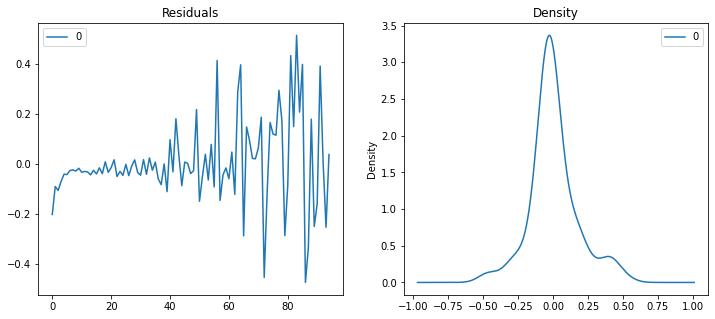

In [38]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize = (12,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

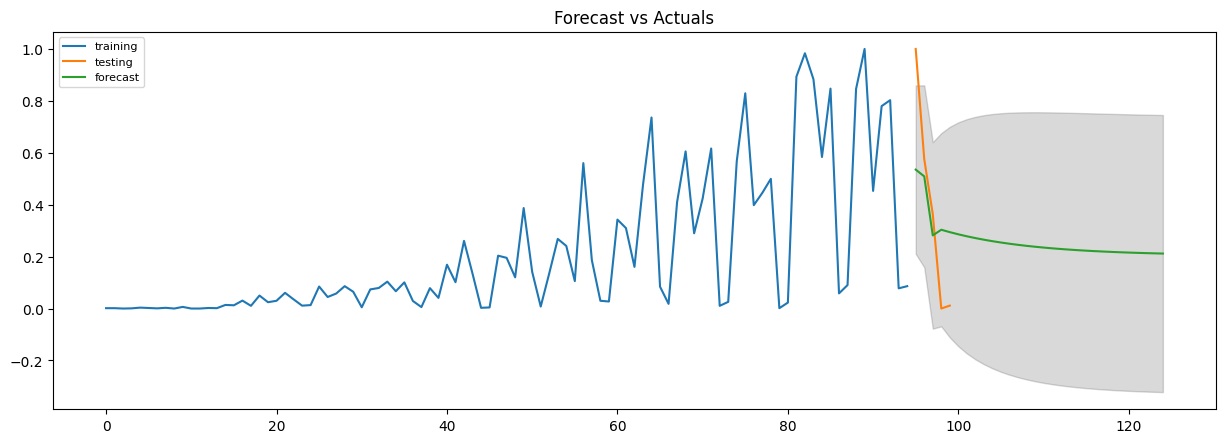

In [39]:
fc, se, conf = model_fit.forecast(30, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series([i for i in fc])
fc_series.index+=train_data.shape[0]
lower_series = pd.Series([i for i in conf[:, 0]])
lower_series.index+=train_data.shape[0]
upper_series = pd.Series([i for i in conf[:, 1]])
upper_series.index+=train_data.shape[0]





# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data,label = 'testing')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [40]:
test_d = np.reshape(sc.inverse_transform(test_data.values.reshape(-1,1)),newshape=(1,-1))[0]
test_d = [int(i) for i in test_d]
forecast_d = np.reshape(sc.inverse_transform(fc_series.values.reshape(-1,1)),newshape=(1,-1))[0]
forecast_d = [int(i) for i in forecast_d]

In [41]:
data_output = pd.concat([pd.Series(test_d),pd.Series(forecast_d)],axis = 1)
data_output.columns = ['test_data','forecasted']
data_output.index+= train_data.shape[0]

In [42]:
data_output

,test_data,forecasted
95,1997.0,1379
96,1433.0,1345
97,1152.0,1043
98,669.0,1072
99,684.0,1059
100,NaN,1048
101,NaN,1038
102,NaN,1029
103,NaN,1021
104,NaN,1013


In [43]:
rmse = np.sqrt(mean_squared_error(data_output['test_data'].iloc[:test_data.shape[0]],data_output['forecasted'].iloc[:test_data.shape[0]]))
print(rmse)

375.38859865478065


**The low accuracy maybe related due to scaling of the data so using fbprophet in unscaled data**

## Using FbProphet fpr Prediction

https://facebook.github.io/prophet/docs/quick_start.html

https://facebook.github.io/prophet/docs/installation.html

In [44]:
from prophet import Prophet

In [45]:
train_size = int(0.95*daily_sum.shape[0])

In [46]:
daily_sum

,Value,Shift_1_diff
Date,,
2022-01-31,3,NaN
2022-02-17,3,0.0
2022-02-28,1,-2.0
2022-03-04,2,1.0
2022-03-31,6,4.0
2022-04-10,4,-2.0
2022-04-12,2,-2.0
2022-04-30,5,3.0
2022-05-06,1,-4.0


In [47]:
train = daily_sum.iloc[0:train_size,:]
test = daily_sum.iloc[train_size:,:]
train = train.reset_index()[['Date','Value']]
test = test.reset_index()[['Date','Value']]
train.columns = ['ds','y']
test.columns = ['ds','y']
print(train.tail())
print('\n',test.tail())


            ds     y
90  2022-08-03   653
91  2022-08-04  1123
92  2022-08-05  1156
93  2022-08-06   113
94  2022-08-07   125

            ds     y
0  2022-08-08  1997
1  2022-08-09  1433
2  2022-08-10  1152
3  2022-08-11   669
4  2022-08-12   684


In [48]:
model_pr = Prophet()
model_pr.fit(train)

12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future = model_pr.make_future_dataframe(periods=25)
future

,ds
0,2022-01-31
1,2022-02-17
2,2022-02-28
3,2022-03-04
4,2022-03-31
...,...
115,2022-08-28
116,2022-08-29
117,2022-08-30
118,2022-08-31


In [50]:
forecast = model_pr.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
115,2022-08-28,530.555652,189.709519,833.436262
116,2022-08-29,983.456133,675.381626,1335.230192
117,2022-08-30,987.247778,654.723501,1312.532849
118,2022-08-31,771.640929,442.458681,1120.708638
119,2022-09-01,969.249140,637.736062,1299.878203


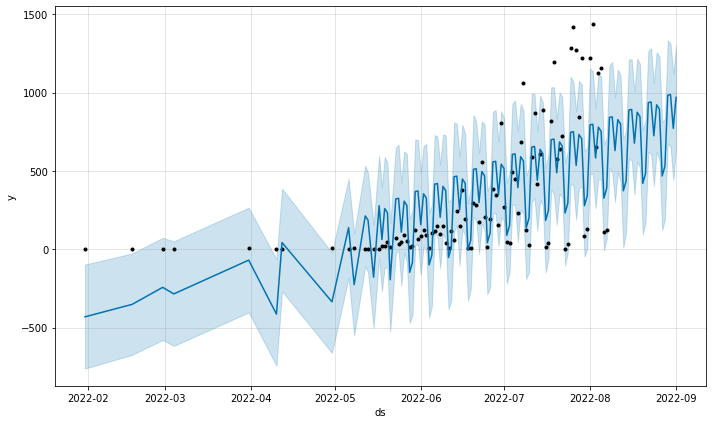

In [51]:
fig1 = model_pr.plot(forecast)

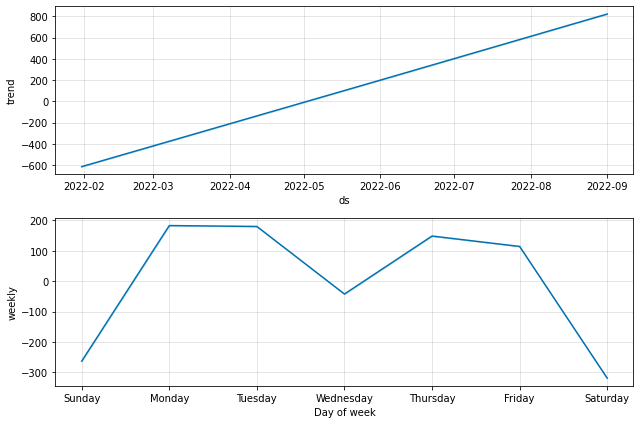

In [52]:
fig2 = model_pr.plot_components(forecast)


In [53]:
forecasts = forecast.iloc[test.index.start:,:][['ds','yhat','yhat_lower','yhat_upper']]
forecasts

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-31,-431.264549,-761.336507,-97.444257
1,2022-02-17,-351.522381,-673.852107,-26.440500
2,2022-02-28,-243.123494,-579.048190,73.187928
3,2022-03-04,-284.969591,-616.946725,50.709423
4,2022-03-31,-69.310797,-403.418158,265.815155
...,...,...,...,...
115,2022-08-28,530.555652,189.709519,833.436262
116,2022-08-29,983.456133,675.381626,1335.230192
117,2022-08-30,987.247778,654.723501,1312.532849
118,2022-08-31,771.640929,442.458681,1120.708638


In [54]:
test = test.reset_index(drop = True)
test

,ds,y
0,2022-08-08,1997
1,2022-08-09,1433
2,2022-08-10,1152
3,2022-08-11,669
4,2022-08-12,684


In [55]:
test.index+=train.shape[0]
test.head()

,ds,y
95,2022-08-08,1997
96,2022-08-09,1433
97,2022-08-10,1152
98,2022-08-11,669
99,2022-08-12,684


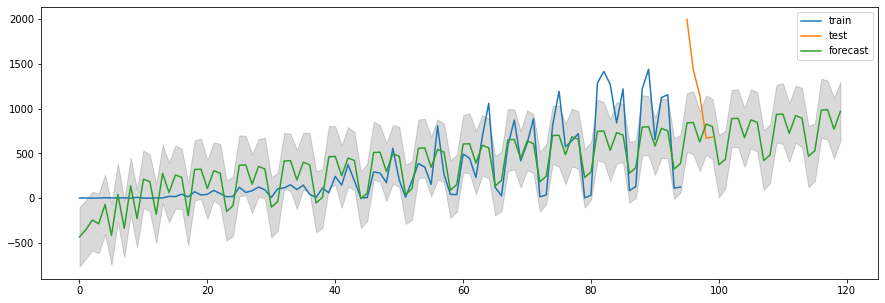

In [56]:
plt.figure(figsize = (15,5))
plt.plot(train['y'],label = 'train')
plt.plot(test['y'],label = 'test')
plt.plot(forecasts['yhat'],label = 'forecast')
plt.fill_between(forecasts.index,forecasts['yhat_lower'],forecasts['yhat_upper'],color = 'k',alpha = 0.15)
plt.legend(loc = 'best')
plt.show()

In [57]:
forecasts['yhat'].iloc[:test.shape[0]]

0   -431.264549
1   -351.522381
2   -243.123494
3   -284.969591
4    -69.310797
Name: yhat, dtype: float64

In [58]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['y'],forecasts['yhat'].iloc[:test.shape[0]]))
print(rmse)

1581.4482949178669


## Using RNNs

In [59]:
rnn_feed = daily_sum.drop(columns=['Shift_1_diff'],axis = 1).reset_index()
rnn_feed.head()

,Date,Value
0,2022-01-31,3
1,2022-02-17,3
2,2022-02-28,1
3,2022-03-04,2
4,2022-03-31,6


In [60]:
features = []
labels = []
train_length = 5
sequences = np.array(rnn_feed['Value'])

for i in range(train_length,len(sequences)):
    extract = sequences[i-train_length:i+1]
    feature = extract[:-1]
    label = extract[-1]
    features.append(np.array(feature))
    labels.append(np.array(label))
    
    
features = np.array(features)
labels = np.array(labels)
    
    

In [61]:
features.shape

(95, 5)

In [62]:
print("Past Data: ",features[20],"Prediction Based on Past: ",labels[20])

Past Data:  [44 88 52 17 20] Prediction Based on Past:  123


In [63]:
#Splitting into train and test
print(features[0], labels[0])
print(features[1],labels[1])

[3 3 1 2 6] 4
[3 1 2 6 4] 2


In [64]:
train_size = int(features.shape[0]*0.85)
X_train = features[0:train_size]
y_train = labels[0:train_size]
X_test = features[train_size:]
y_test = labels[train_size:]

In [65]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [66]:
X_train = np.reshape(a = X_train,newshape=(X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(a = X_test,newshape=(X_test.shape[0], X_test.shape[1], 1))

In [67]:
print(X_train.shape)
print(X_test.shape)

(80, 5, 1)
(15, 5, 1)


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,Bidirectional, BatchNormalization, Input
from tensorflow.keras import callbacks

In [69]:
model = Sequential()

model.add(Bidirectional(LSTM(units = 30,return_sequences=True,return_state=False),input_shape = (X_train.shape[1],1)))
model.add(LSTM(units = 30,return_sequences=True,recurrent_dropout=0.1,return_state=False))
# model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.30))

model.add(LSTM(units=30,return_sequences=True,return_state=False))
model.add(LSTM(units = 30,return_sequences=True,recurrent_dropout=0.1,return_state=False))
# model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.30))


model.add(LSTM(units = 30,recurrent_dropout=0.1))
# model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.30))

model.add(Dense(1,activation = 'linear'))
model.compile(optimizer='adam',loss = 'mean_squared_error',metrics = ['mean_absolute_error'])
model.summary()

2022-08-13 12:44:44.184712: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 12:44:44.190000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 12:44:44.190737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 12:44:44.191781: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 5, 60)             7680      
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 30)             10920     
_________________________________________________________________
dropout (Dropout)            (None, 5, 30)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 30)             7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 30)             7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 30)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 30)                7

In [70]:
callbacks = [callbacks.ReduceLROnPlateau(verbose=1,factor=1e-04),callbacks.EarlyStopping(verbose=1,patience=15)]

In [71]:
history = model.fit(X_train,y_train,batch_size=1,epochs = 10000,validation_split=0.1,callbacks=callbacks)

2022-08-13 12:44:48.396350: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10000


2022-08-13 12:44:55.499436: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


72/72 [==============================] - 12s 49ms/step - loss: 124530.6953 - mean_absolute_error: 215.4715 - val_loss: 853319.0625 - val_mean_absolute_error: 770.5879
Epoch 2/10000
72/72 [==============================] - 3s 35ms/step - loss: 121551.0859 - mean_absolute_error: 210.0233 - val_loss: 849509.3750 - val_mean_absolute_error: 768.7268
Epoch 3/10000
72/72 [==============================] - 2s 31ms/step - loss: 120932.9453 - mean_absolute_error: 208.7218 - val_loss: 847277.1250 - val_mean_absolute_error: 767.6345
Epoch 4/10000
72/72 [==============================] - 2s 31ms/step - loss: 120283.8359 - mean_absolute_error: 208.0036 - val_loss: 845320.1250 - val_mean_absolute_error: 766.6750
Epoch 5/10000
72/72 [==============================] - 2s 30ms/step - loss: 119592.7500 - mean_absolute_error: 207.0410 - val_loss: 843413.4375 - val_mean_absolute_error: 765.7388
Epoch 6/10000
72/72 [==============================] - 2s 31ms/step - loss: 119420.5312 - mean_absolute_error: 20

In [72]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error', 'lr'])

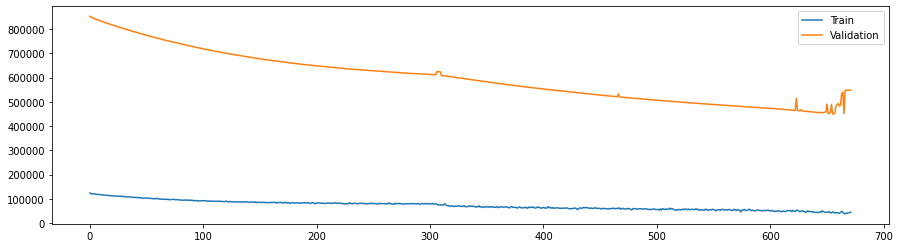

In [73]:
plt.figure(figsize=(15,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Validation'])

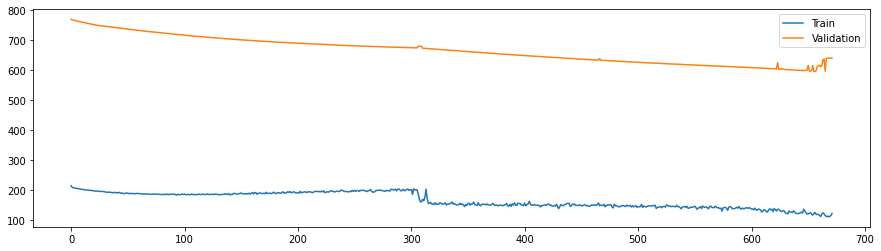

In [74]:
plt.figure(figsize=(15,4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['Train','Validation'])

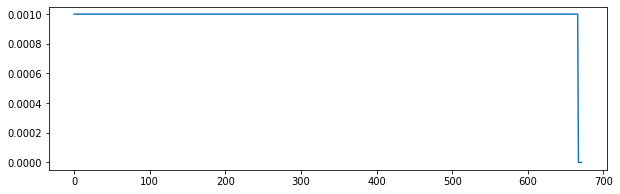

In [75]:
plt.figure(figsize = (10,3))
plt.plot(history.history['lr'])

In [76]:
pred = model.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

776.4571916812254

In [78]:
pd_test = pd.Series(y_test)
pd_test.index+=y_train.shape[0]


In [79]:
pred.reshape(1,-1)

array([[347.65485, 347.65216, 347.6549 , 347.6551 , 347.11154, 347.63684,
        347.65393, 347.65424, 347.65118, 347.6547 , 347.65076, 347.644  ,
        347.47482, 347.65448, 347.65503]], dtype=float32)

In [80]:
pd_pred = pd.Series(pred.reshape(1,-1)[0])
pd_pred.index+=y_train.shape[0]

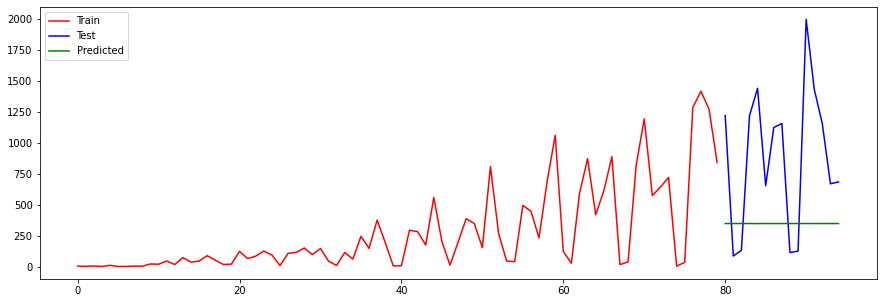

In [81]:
plt.figure(figsize = (15,5))
plt.plot(y_train,'-r',label = 'Train')
plt.plot(pd_test,'-b',label ='Test')
plt.plot(pd_pred,'-g',label = 'Predicted')
plt.legend()

## Other Analysis

In [82]:
data_to_pred = df_daily.sum().drop('Country')
data_to_pred = data_to_pred.to_frame()
data_to_pred.reset_index(inplace=True)
data_to_pred.columns = ['Date','Confirmed_Cases']


In [83]:
data_to_pred['Date'] = pd.to_datetime(data_to_pred['Date'])

In [84]:
data_to_pred_month = data_to_pred.copy(deep=True)
data_to_pred_month['Month'] = data_to_pred['Date'].dt.strftime("%b")
data_to_pred_month.head()

,Date,Confirmed_Cases,Month
0,2022-01-31,3,Jan
1,2022-02-17,3,Feb
2,2022-02-28,1,Feb
3,2022-03-04,2,Mar
4,2022-03-31,6,Mar


<AxesSubplot:xlabel='Month'>

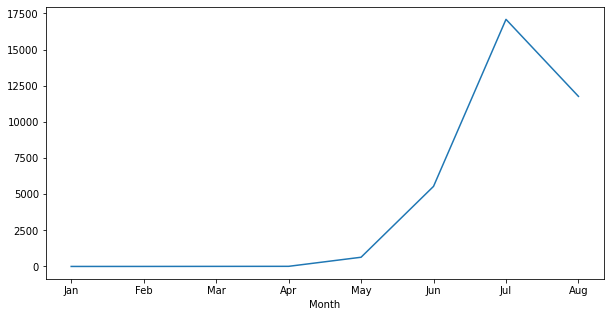

In [85]:
pred_month = data_to_pred_month.groupby('Month')['Confirmed_Cases'].sum()
pred_month.index = pd.CategoricalIndex(data = pred_month.index,categories=data_to_pred_month['Month'].unique(),
                                      ordered = True)
pred_month = pred_month.sort_index()
pred_month.plot(kind = 'line',figsize = (10,5))

**Almost Linear Growth After May**

In [86]:
df_daily_new = df_daily.transpose()
header = df_daily_new.iloc[0]
df_daily_new = df_daily_new[1:]
df_daily_new.columns = header
df_daily_new.head()

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,France,Belgium,Germany,Italy,Canada,Sweden,Netherlands,Australia,Switzerland,Israel,Scotland,Austria,Denmark,United Arab Emirates,Czech Republic,Slovenia,...,New Caledonia,Bosnia And Herzegovina,India,Saudi Arabia,Martinique,Barbados,Qatar,Costa Rica,Thailand,Bermuda,Liberia,Andorra,Guadeloupe,Japan,Philippines,Uruguay,Sudan,Saint Martin (French part),Bolivia,Montenegro,Cyprus,Lithuania,Guatemala,Moldova,Greenland
2022-01-31,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
df_world.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,2883.0,0.0,5.0,2.0,7.0
1,Portugal,770.0,0.0,0.0,0.0,34.0
2,Spain,5719.0,0.0,13.0,2.0,0.0
3,United States,10726.0,0.0,4.0,41.0,10.0
4,Canada,1058.0,12.0,1.0,3.0,0.0


In [88]:
df_world.nlargest(n= 15,columns= 'Confirmed_Cases')

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
3,United States,10726.0,0.0,4.0,41.0,10.0
2,Spain,5719.0,0.0,13.0,2.0,0.0
10,Germany,3102.0,0.0,18.0,19.0,16.0
0,England,2883.0,0.0,5.0,2.0,7.0
7,France,2659.0,0.0,1.0,2.0,1.0
37,Brazil,2458.0,7.0,3.0,20.0,4.0
4,Canada,1058.0,12.0,1.0,3.0,0.0
11,Netherlands,1025.0,0.0,0.0,1.0,0.0
1,Portugal,770.0,0.0,0.0,0.0,34.0
36,Peru,653.0,1.0,2.0,2.0,0.0


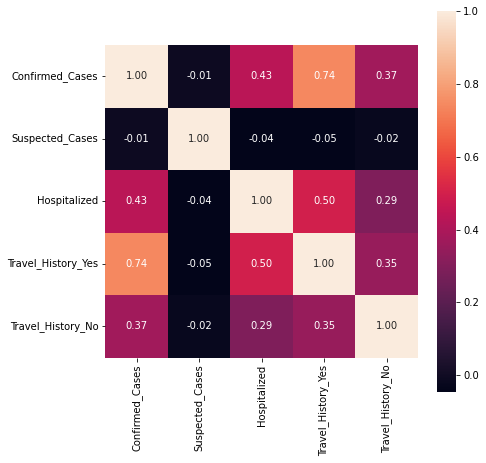

In [89]:
plt.figure(figsize = (7,7))
sns.heatmap(data = df_world.corr(),fmt = '.2f',linecolor='white',square=True,annot=True)
plt.show()

**Confirmed Cases increases with increase in travel history**

**More Confirmed Cases more hospitalization**

**People are getting affected even without travel history so the disease has entered the society as well**



Text(0.5, 1.0, 'Most Confirmed Cases')

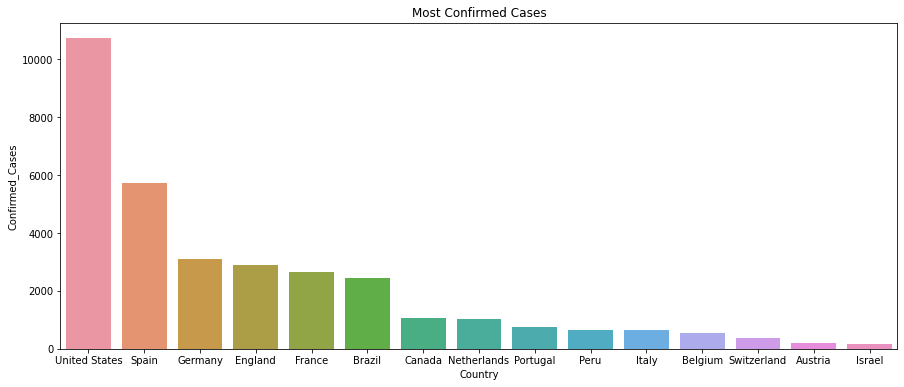

In [90]:
most_affected_15 = df_world.nlargest(n= 15,columns= 'Confirmed_Cases')[['Country','Confirmed_Cases']]
plt.figure(figsize = (15,6))
sns.barplot(x = 'Country',y = 'Confirmed_Cases',data = most_affected_15)
plt.title('Most Confirmed Cases')

Text(0.5, 1.0, 'Most Hospitalized Countries')

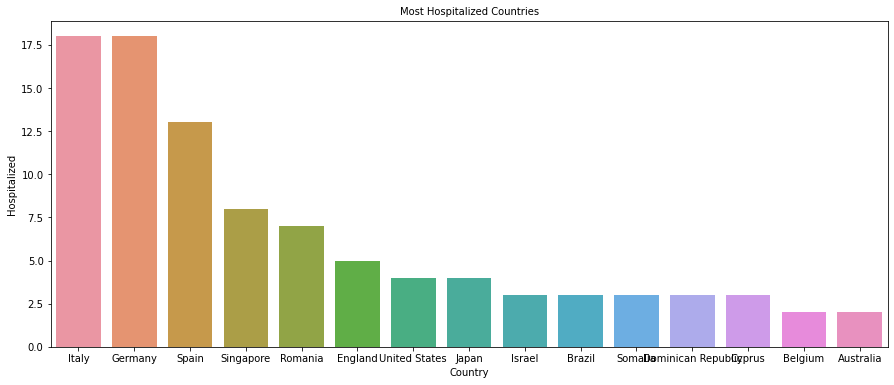

In [91]:
most_hospitalized= df_world.nlargest(n = 15,columns='Hospitalized')
plt.figure(figsize = (15,6))
sns.barplot(x = 'Country',y = 'Hospitalized',data = most_hospitalized)
plt.title('Most Hospitalized Countries',fontsize = 10)

In [92]:
#Travel Based Analysis
travel = df_world.copy()
travel['frequency_of_travel'] = pd.cut(x = travel['Travel_History_Yes'],bins=[-1,0,5,12,18,25,100], 
                                       labels = ['zero','1-5','6-12','13-18','19-25','25+'])
travel.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,frequency_of_travel
0,England,2883.0,0.0,5.0,2.0,7.0,1-5
1,Portugal,770.0,0.0,0.0,0.0,34.0,zero
2,Spain,5719.0,0.0,13.0,2.0,0.0,1-5
3,United States,10726.0,0.0,4.0,41.0,10.0,25+
4,Canada,1058.0,12.0,1.0,3.0,0.0,1-5


<AxesSubplot:xlabel='frequency_of_travel', ylabel='Confirmed_Cases'>

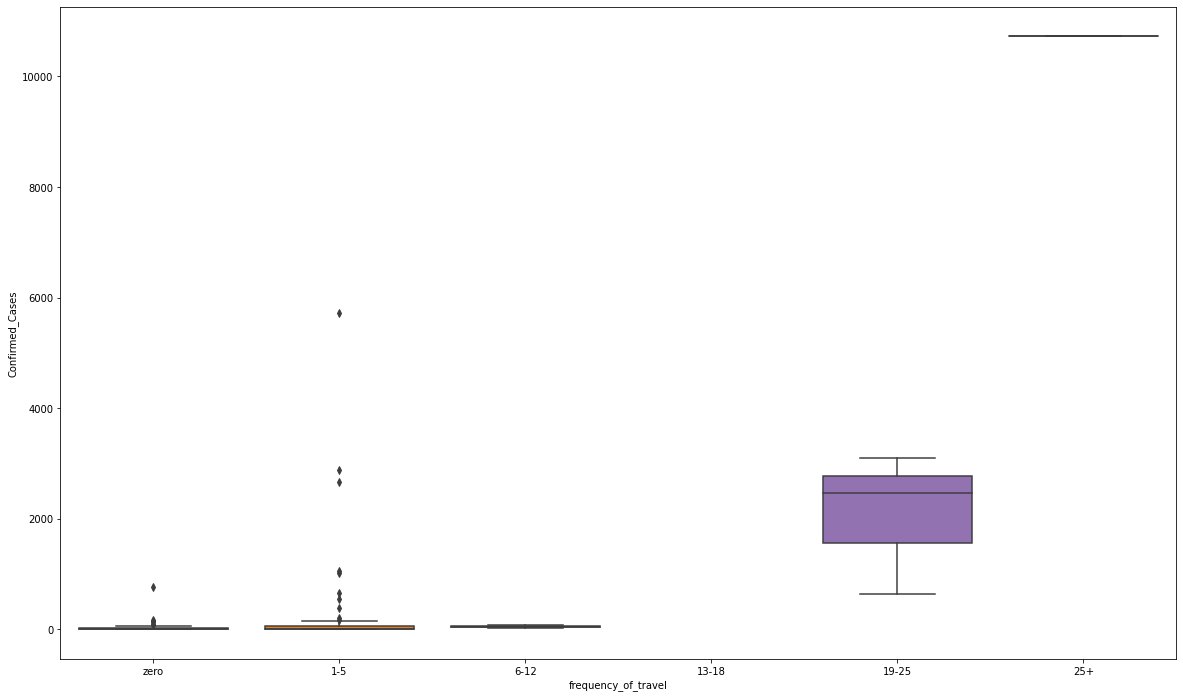

In [93]:
plt.figure(figsize= (20,12))
sns.boxplot(x = travel['frequency_of_travel'],y = travel['Confirmed_Cases'])

**Disease spread the most when people travel more**

In [94]:
#Travel Based Analysis
travel['frequency_of_no_travel'] = pd.cut(x = travel['Travel_History_No'],bins=[-1,0,5,12,18,25,100], 
                                       labels = ['zero','1-5','6-12','13-18','19-25','25+'])
travel.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,frequency_of_travel,frequency_of_no_travel
0,England,2883.0,0.0,5.0,2.0,7.0,1-5,6-12
1,Portugal,770.0,0.0,0.0,0.0,34.0,zero,25+
2,Spain,5719.0,0.0,13.0,2.0,0.0,1-5,zero
3,United States,10726.0,0.0,4.0,41.0,10.0,25+,6-12
4,Canada,1058.0,12.0,1.0,3.0,0.0,1-5,zero


<AxesSubplot:xlabel='frequency_of_no_travel', ylabel='Confirmed_Cases'>

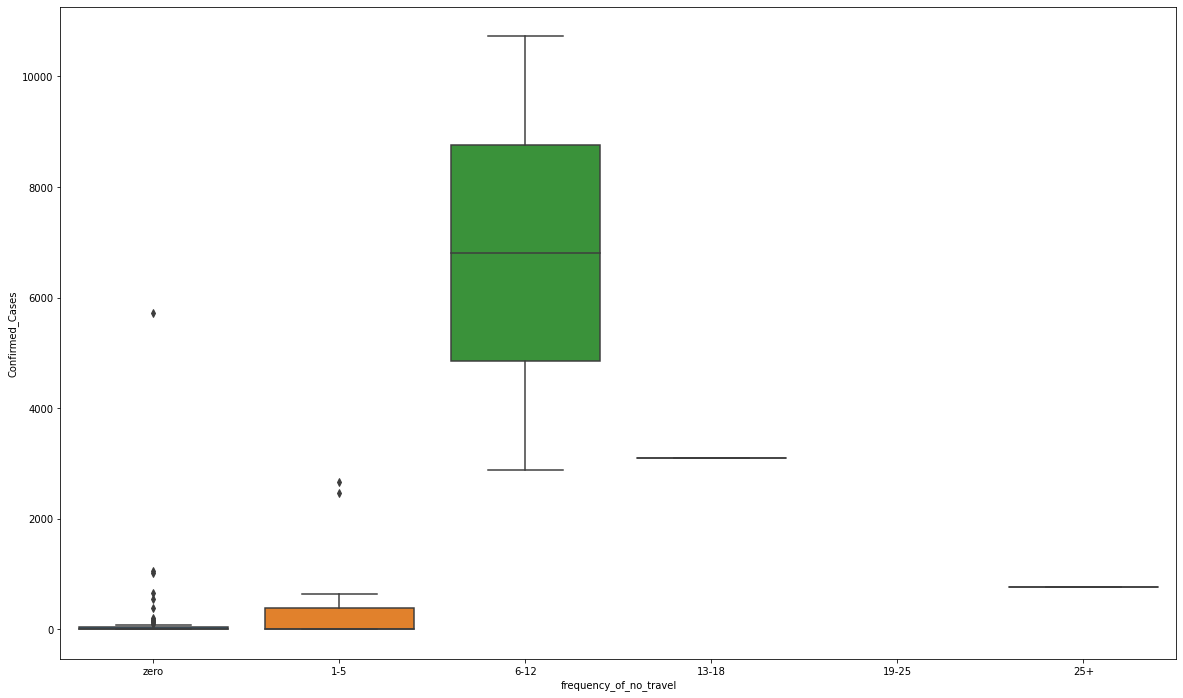

In [95]:
plt.figure(figsize= (20,12))
sns.boxplot(x = travel['frequency_of_no_travel'],y = travel['Confirmed_Cases'])

**The more the no travel, the less the number of confirmed cases, so the less the spread**

In [96]:
df_world_timeline.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [97]:
df_world_timeline['Month'] = pd.to_datetime(df_world_timeline['Date_confirmation']).dt.month_name()

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

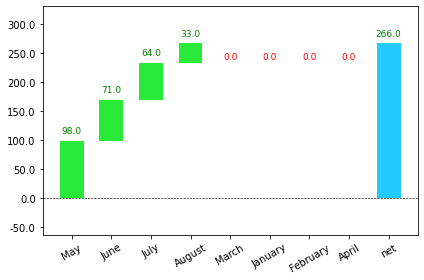

In [98]:
df_month_hosp = df_world_timeline.groupby(['Month'])['Hospitalised (Y/N/NA)'].count()
waterfall_chart.plot(data = df_month_hosp.values,index = df_month_hosp.index,sorted_value=True)

**Highest Growth was in May Till Now**